<a href="https://colab.research.google.com/github/yanaa11/media-opinion-analyzer/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). Целевой признак записан в переменной radiant_win. 

### Обучение классификаторов на вещественных признаках

#### Импорты

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

#### Загрузка данных

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path_to_data = '/content/drive/MyDrive/lab1_data/'
train_df = pd.read_csv(path_to_data + 'train.csv')
gold_df = pd.read_csv(path_to_data + 'gold.csv')
lh_df = pd.read_csv(path_to_data + 'lh.csv')

In [9]:
train_df

,mid,radiant_won
0,0,1
1,1,0
2,2,1
3,4,1
4,5,1
...,...,...
24969,49939,0
24970,49940,1
24971,49941,1
24972,49945,0


In [10]:
gold_df

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,750,350,389,437,428,398,344,654,287,1056
1,0,120,957,1071,633,655,1080,669,1147,1164,438,1360
2,0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
3,0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
4,0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302
...,...,...,...,...,...,...,...,...,...,...,...,...
499475,49947,360,2640,1356,4493,3186,2720,2244,1236,2150,2232,2850
499476,49947,420,3176,1854,5259,3336,3299,2706,1449,2541,2621,3345
499477,49947,480,3760,2005,6313,3487,3450,3171,1600,3360,3184,3865
499478,49947,540,4041,2155,7999,4242,3724,3541,2271,3883,3453,4513


In [11]:
lh_df

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,7,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,13,1,13,12,9,12,29,1,10
4,0,300,2,15,1,17,19,13,13,36,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...
499475,49947,360,25,4,27,7,27,20,4,21,19,21
499476,49947,420,31,9,35,7,35,26,5,27,24,27
499477,49947,480,39,9,46,7,35,31,5,29,28,34
499478,49947,540,41,9,61,8,37,36,5,31,30,42


#### 1

Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**Задание 1** (1 балл) 

Проанализируйте датасет и найдите все признаки, имеющие пропущенные значения (опишите свои наблюдения). 

Предобработайте текущий датасет так, что бы в нём не осталось пропусков (обоснуйте свой выбор метода предобработки).

***Решение задания 1:***

В датасете нет пропусков, но если бы были: 

*В train.csv:* 

Строки с пропусками убрать из датасета, т.к. по ним всё равно ничего нельзя предсказать/обучить. Если нет значения в `mid`, нельзя сопоставить отклику `radiant_won` предикторы. А если нет значения в `radiant_won`, то не известен отклик для набора предикторов. 

*В gold.csv и lh.csv*: 

Если нет значения в `mid`, то не известно, к какой команде относятся данные -> не известен отклик и не понятно, к чему "подклеивать". Следовательно, строки с пропусками в колонке `mid` удалить. 

Если нет значения признака у игрока (одного или нескольких) в любой из таблиц, то можно заменить пропуск: 
   
   * Средним значением по строке - средним по команде. 
   * Значением в предыдущий момент времени для того же игрока. 
   * Значением в следующий момент времени для того же игрока.
   * Средним значением между значениями в предыдущий и последующий моменты времени для того же игрока. 

Я использую (примерно) замену средним, реализуя это с помощью `pd.DataFrame.interpolate` (см. пример кода). 
   
Если пропущенно значение в колонке `times`, то заменю пропуск значением из предыдущей записи той же команды плюс 60 секунд (т.к. можно увидеть эту закономерность в столбце).


Для примера кода возьму небольшой кусочек от `lh_df`, искусственно сделаю в нем немного пропусков и поборюсь с ними:

In [ ]:
# искусственный кусочек с пропусками

mydf = lh_df[:20]
mydf = mydf.replace([13, 7, 63], -1)
mydf = mydf.replace(180, -1)
mydf['mid'][6, 15] = [-1, -1]

mydf

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,-1,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,-1,2,10,1,-1,8,9,9,18,1,9
3,0,240,2,-1,1,-1,12,9,12,29,1,10
4,0,300,2,15,1,17,19,-1,-1,36,1,19
5,0,360,2,20,1,20,24,16,17,42,1,31
6,-1,420,3,26,1,28,30,16,21,52,1,31
7,0,480,4,36,1,36,35,16,28,-1,2,36
8,0,540,4,37,2,43,40,25,30,72,2,38
9,0,600,4,43,3,57,41,34,35,75,2,46


In [ ]:
# чтобы было проще с ними работать, заменю -1 на NaN
mydf = mydf.replace(-1, np.NaN)

# посмотрю, где сколько пропусков  
mydf.isna().sum()

mid         2
times       2
player_0    0
player_1    3
player_2    1
player_3    3
player_4    1
player_5    3
player_6    1
player_7    2
player_8    0
player_9    1
dtype: int64

In [ ]:
# выброшу строки с пропущенными значениями в `mid`
mydf = mydf.dropna(subset=['mid'])
# почему-то после этой операции значения в `mid` стали float, поэтому так:
mydf['mid'] = mydf['mid'].astype(int)
mydf

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60.0,1,2.0,1.0,1.0,2.0,3.0,2.0,NaN,1,2.0
1,0,120.0,1,5.0,1.0,2.0,6.0,5.0,6.0,14.0,1,6.0
2,0,NaN,2,10.0,1.0,NaN,8.0,9.0,9.0,18.0,1,9.0
3,0,240.0,2,NaN,1.0,NaN,12.0,9.0,12.0,29.0,1,10.0
4,0,300.0,2,15.0,1.0,17.0,19.0,NaN,NaN,36.0,1,19.0
5,0,360.0,2,20.0,1.0,20.0,24.0,16.0,17.0,42.0,1,31.0
7,0,480.0,4,36.0,1.0,36.0,35.0,16.0,28.0,NaN,2,36.0
8,0,540.0,4,37.0,2.0,43.0,40.0,25.0,30.0,72.0,2,38.0
9,0,600.0,4,43.0,3.0,57.0,41.0,34.0,35.0,75.0,2,46.0
10,1,60.0,1,2.0,1.0,3.0,3.0,1.0,3.0,1.0,2,5.0


Здесь прохожусь по каждой игре отдельно, чтобы данные других игр не учитывались при замене пропущенных значений для одной игры. 

Для заполнения основных пропусков ипользую `interpolate()` с `method='linear'` (значение параметра по умолчанию).

И привожу всё обратно к `int`. 

In [ ]:
filled_mydf = pd.DataFrame()
for i in mydf['mid'].unique():
    mid_filled = mydf[mydf['mid'] == i].interpolate(limit_direction="both").astype(int)
    filled_mydf = pd.concat([filled_mydf, mid_filled])
    
filled_mydf

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,14,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,12,1,12,12,9,12,29,1,10
4,0,300,2,15,1,17,19,12,14,36,1,19
5,0,360,2,20,1,20,24,16,17,42,1,31
7,0,480,4,36,1,36,35,16,28,57,2,36
8,0,540,4,37,2,43,40,25,30,72,2,38
9,0,600,4,43,3,57,41,34,35,75,2,46
10,1,60,1,2,1,3,3,1,3,1,2,5


#### 2

В начале мы будем работать только с вещественными признаками. 

Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv* (см. [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)).

In [12]:
# подклеиваю gold
train_df = train_df.join(gold_df[gold_df['times'] == 600].set_index('mid'), on='mid')
# подклеиваю lh, добавляя к колонкам суффикс '_lh'
train_df = train_df.join(lh_df[lh_df['times'] == 600].set_index('mid'), on='mid', lsuffix='_lh')
# убираю колонки про время
train_df = train_df.drop(columns=['times_lh', 'times'])
train_df

,mid,radiant_won,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,1,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,4,43,3,57,41,34,35,75,2,46
1,1,0,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,5,63,14,28,47,49,23,3,30,39
2,2,1,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,34,6,69,42,23,6,12,56,13,12
3,4,1,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,30,41,45,23,4,26,9,23,37,6
4,5,1,4252,2412,2545,4264,2544,4752,5389,4954,3954,2992,42,5,16,30,3,42,24,53,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24969,49939,0,4262,7316,3996,3863,2199,5718,3876,4296,4497,2520,49,74,30,12,2,47,5,35,39,4
24970,49940,1,7250,3984,6380,2954,6243,3095,5105,1811,4823,2471,48,2,54,12,61,26,71,4,49,5
24971,49941,1,2873,4727,4655,4923,3645,5978,2801,3875,4644,5213,31,54,42,52,7,49,1,10,16,53
24972,49945,0,2325,1813,2530,4807,5542,2242,2359,5997,5523,2044,13,6,2,37,67,7,7,61,49,2


**Задание 2** (1 балл)

Постройте для команд radiant и dire различные агригаты по игрокам на 600 секунде. Опишите какие именно агригаты вы построили и почему.

***Решение задания 2:***

И для *gold*, и для *lh* возьму суммарное значение по каждой команде, так как это опишет команды как целое. Среднее брать не будет смысла, так как это сумма/5 - линейная зависимость. 

In [13]:
train_df['rad_gold_sum'] = train_df.iloc[:, 12:17].apply(lambda x: sum(x), axis=1)
train_df['dire_gold_sum'] = train_df.iloc[:, 17:22].apply(lambda x: sum(x), axis=1)
train_df['rad_lh_sum'] = train_df.iloc[:, 2:7].apply(lambda x: sum(x), axis=1)
train_df['dire_lh_sum'] = train_df.iloc[:, 7:12].apply(lambda x: sum(x), axis=1)

train_df.head()

,mid,radiant_won,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9,rad_gold_sum,dire_gold_sum,rad_lh_sum,dire_lh_sum
0,0,1,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,4,43,3,57,41,34,35,75,2,46,148,192,21454,22095
1,1,0,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,5,63,14,28,47,49,23,3,30,39,157,144,22165,24536
2,2,1,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,34,6,69,42,23,6,12,56,13,12,174,99,21392,15548
3,4,1,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,30,41,45,23,4,26,9,23,37,6,143,101,18038,17484
4,5,1,4252,2412,2545,4264,2544,4752,5389,4954,3954,2992,42,5,16,30,3,42,24,53,12,14,96,145,16017,22041


Так же посчитаю для каждой команды стандартное отклонение для *lh* и  *gold*. Полагаю, что это будет показывать разброс "активности" игроков команды: маленькая дисперсия - все играют примерно одинаково, большая - у игроков или разные стратегии, или навыки игры и т.п. 

In [14]:
train_df['rad_gold_std'] = train_df.iloc[:, 12:17].apply(lambda x: np.std(x), axis=1)
train_df['dire_gold_std'] = train_df.iloc[:, 17:22].apply(lambda x: np.std(x), axis=1)
train_df['rad_lh_std'] = train_df.iloc[:, 2:7].apply(lambda x: np.std(x), axis=1)
train_df['dire_lh_std'] = train_df.iloc[:, 7:12].apply(lambda x: np.std(x), axis=1)

train_df.head()

,mid,radiant_won,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9,rad_gold_sum,dire_gold_sum,rad_lh_sum,dire_lh_sum,rad_gold_std,dire_gold_std,rad_lh_std,dire_lh_std
0,0,1,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,4,43,3,57,41,34,35,75,2,46,148,192,21454,22095,22.014541,23.465720,1141.490149,1652.958439
1,1,0,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,5,63,14,28,47,49,23,3,30,39,157,144,22165,24536,21.228283,15.574338,1243.561820,1584.853987
2,2,1,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,34,6,69,42,23,6,12,56,13,12,174,99,21392,15548,20.932272,18.269100,2297.686193,1044.474720
3,4,1,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,30,41,45,23,4,26,9,23,37,6,143,101,18038,17484,14.568459,11.408769,1031.575223,740.839092
4,5,1,4252,2412,2545,4264,2544,4752,5389,4954,3954,2992,42,5,16,30,3,42,24,53,12,14,96,145,16017,22041,14.905033,16.024980,862.443876,847.347013


Я долго думала и не сообразила, надо ли после создания агрегатов убирать исходные признаки. Решила, что все убирать не буду, но уберу все признаки для `player_0` и `player_5`, чтобы убрать линейную зависимость, возникшую при добавлении суммы по командам. 

In [15]:
train_df = train_df.drop(columns=['player_0', 'player_0_lh', 'player_5', 'player_5_lh'])

In [16]:
train_df.head()

,mid,radiant_won,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,player_1,player_2,player_3,player_4,player_6,player_7,player_8,player_9,rad_gold_sum,dire_gold_sum,rad_lh_sum,dire_lh_sum,rad_gold_std,dire_gold_std,rad_lh_std,dire_lh_std
0,0,1,5206,2613,4426,5755,3997,5917,1725,6384,43,3,57,41,35,75,2,46,148,192,21454,22095,22.014541,23.465720,1141.490149,1652.958439
1,1,0,5760,3816,4353,5759,5066,2748,4440,4623,63,14,28,47,23,3,30,39,157,144,22165,24536,21.228283,15.574338,1243.561820,1584.853987
2,2,1,1948,8581,4390,2869,2301,5130,2530,2491,6,69,42,23,12,56,13,12,174,99,21392,15548,20.932272,18.269100,2297.686193,1044.474720
3,4,1,4103,5154,3030,2076,3494,3392,4458,2220,41,45,23,4,9,23,37,6,143,101,18038,17484,14.568459,11.408769,1031.575223,740.839092
4,5,1,2412,2545,4264,2544,5389,4954,3954,2992,5,16,30,3,24,53,12,14,96,145,16017,22041,14.905033,16.024980,862.443876,847.347013


#### подготовка

Сейчас и далее будем рассматривать следующие алгоритмы:
 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Разделю данные на обучающую и тестовую выборку.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['mid', 'radiant_won']), train_df['radiant_won'], test_size=0.2, random_state=1234)

In [18]:
len(X_train), len(X_test)

(19979, 4995)

Посмотрю, сбалансированы ли классы. В изначальных данных: 

In [19]:
train_df['radiant_won'].value_counts()

1    12974
0    12000
Name: radiant_won, dtype: int64

В обучающей и тестовой выборках:

In [20]:
y_train.value_counts(), y_test.value_counts()

(1    10407
 0     9572
 Name: radiant_won, dtype: int64, 1    2567
 0    2428
 Name: radiant_won, dtype: int64)

Все хорошо, везде классы сбалансированы. 

#### 3

**Задание 3** (1.5 балла) 

Для каждого алгоритма выберете один гиперпараметр и подберите его оптимальное значение. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

***Решение задания 3:***

Согласно документации к GridSearchCV, там по умолчанию используется 5-fold кросс-валидация (и для классификатора используется StratifiedKFold вместо KFold, чтобы сохранить соотношение классов). Поэтому для осуществления 5-fold CV просто ничего не меняю в модели. 

Иcпользую `scoring='roc-auc'`. 

*Чтобы модели обучались за терпимое время, буду использовать по 4000 элементов от исходных данных.*

In [16]:
data_part=4000
test_part=1000

##### 3 LogReg
**3.1. Logistic Regression Classifier**

Буду подбирать значение для `C` - inverse of regularization strength. 

Хотела сначала оставить всё остальное дефолтное( `penalty='l2'`, `solver='lbfgs'`, `tol=1e-4`), но так алгоритм не сходился и ругался на масштаб признаков. Поменяла `solver` на `liblinear`: сошлось!

In [ ]:
# Инициализирую модель
logreg_model = LogisticRegression(penalty='l2', 
                                  tol=0.0001, 
                                  C=1.0, 
                                  solver='liblinear', 
                                  random_state=1234,
                                  max_iter=100)

# Тестируемые значения гиперпараметрa 
logreg_params_set = {
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4]
}

# Кросс-валидация
logreg_CV = GridSearchCV(estimator=logreg_model,
                         param_grid=logreg_params_set,
                         scoring='roc_auc',
                         return_train_score=True)

logreg_CV.fit(X_train[:data_part], y_train[:data_part])

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1234, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0, 1000.0,
                               10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

Лучший параметр и значение критерия качества на нём:

In [ ]:
logreg_CV.best_params_ , logreg_CV.best_score_

({'C': 10}, 0.7129001759427966)

График среднего значения качества:

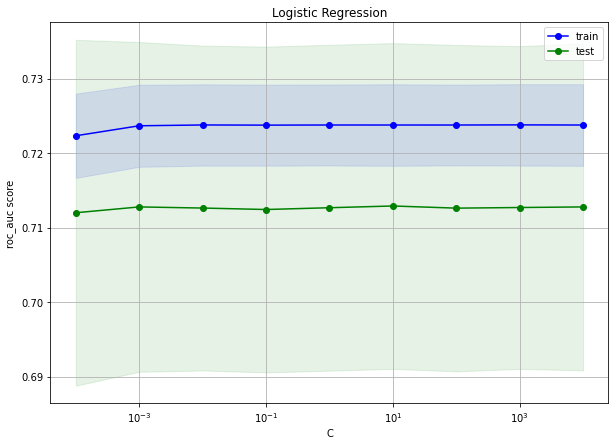

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(logreg_params_set['C'], logreg_CV.cv_results_['mean_train_score'], 'bo-', label='train')
plt.plot(logreg_params_set['C'], logreg_CV.cv_results_['mean_test_score'], 'go-', label='test')

plt.fill_between(logreg_params_set['C'], 
                 logreg_CV.cv_results_['mean_train_score']-logreg_CV.cv_results_['std_train_score'], 
                 logreg_CV.cv_results_['mean_train_score']+logreg_CV.cv_results_['std_train_score'], 
                 color='blue', alpha=0.1)
plt.fill_between(logreg_params_set['C'], 
                 logreg_CV.cv_results_['mean_test_score']-logreg_CV.cv_results_['std_test_score'], 
                 logreg_CV.cv_results_['mean_test_score']+logreg_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.grid()
plt.xlabel('C'), 
plt.ylabel('roc_auc score')
plt.title('Logistic Regression')
plt.xscale('log')
plt.legend()
plt.show()

Оценка качества на части (1000 элементов) тестовой выборки:

In [ ]:
lr_test_score = roc_auc_score(y_true=y_test[:test_part], y_score=logreg_CV.best_estimator_.predict(X_test[:test_part]))
lr_test_score

0.6837360122584026

##### 3 SVC
**3.2. C-Support Vector Classification**

Буду так же подбирать значение для `C` - inverse of regularization strength. 

Остальные параметры оставляю по умолчанию. 

In [ ]:
# Инициализирую модель
svc_model = SVC(C=1.0, 
                kernel='rbf',
                gamma='scale',
                shrinking=True,
                tol=0.001,
                random_state=1234)

# Тестируемые значения гиперпараметрa 
svc_params_set = {
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4]
}

# Кросс-валидация
svc_CV = GridSearchCV(estimator=svc_model,
                      param_grid=svc_params_set,
                      scoring='roc_auc',
                      return_train_score=True,
                      verbose=3)

svc_CV.fit(X_train[:data_part], y_train[:data_part])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.0001, score=(train=0.706, test=0.747), total=   0.9s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ........ C=0.0001, score=(train=0.719, test=0.693), total=   0.9s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] ........ C=0.0001, score=(train=0.710, test=0.732), total=   0.8s
[CV] C=0.0001 ........................................................
[CV] ........ C=0.0001, score=(train=0.718, test=0.700), total=   0.8s
[CV] C=0.0001 ........................................................
[CV] ........ C=0.0001, score=(train=0.721, test=0.691), total=   0.8s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.706, test=0.747), total=   0.8s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.719, test=0.693), total=   0.9s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.710, test=0.732), total=   0.8s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.718, test=0.699), total=   0.8s
[CV] C=0.001 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1234, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0, 1000.0,
                               10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=3)

Лучший параметр и значение критерия качества на нём:

In [ ]:
svc_CV.best_params_ , svc_CV.best_score_

({'C': 0.001}, 0.7125971285634678)

График среднего значения качества:

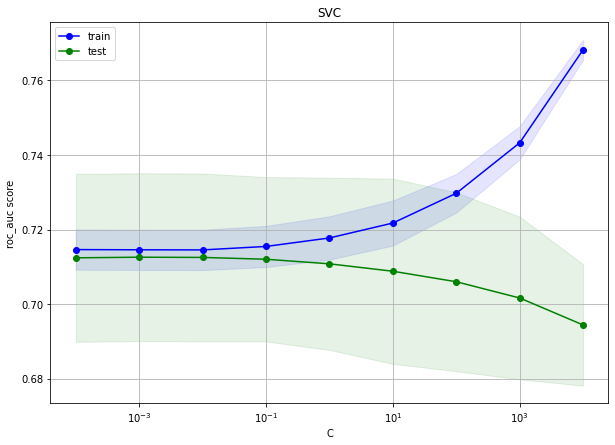

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(svc_params_set['C'], svc_CV.cv_results_['mean_train_score'], 'bo-', label='train')
plt.plot(svc_params_set['C'], svc_CV.cv_results_['mean_test_score'], 'go-', label='test')

plt.fill_between(svc_params_set['C'], 
                 svc_CV.cv_results_['mean_train_score']-svc_CV.cv_results_['std_train_score'], 
                 svc_CV.cv_results_['mean_train_score']+svc_CV.cv_results_['std_train_score'], 
                 color='blue', alpha=0.1)
plt.fill_between(svc_params_set['C'], 
                 svc_CV.cv_results_['mean_test_score']-svc_CV.cv_results_['std_test_score'], 
                 svc_CV.cv_results_['mean_test_score']+svc_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.grid()
plt.xlabel('C'), 
plt.ylabel('roc_auc score')
plt.title('SVC')
plt.xscale('log')
plt.legend()
plt.show()

Оценка качества на части (1000 элементов) тестовой выборки:

In [ ]:
svc_test_score = roc_auc_score(y_true=y_test[:test_part], y_score=svc_CV.best_estimator_.predict(X_test[:test_part]))
svc_test_score

0.5

##### 3 MLPC
**3.3. Multi-layer Perceptron classifier**

Буду так же подбирать параметр, отвечающий за регуляризацию: `alpha`.

C остальными параметрами по умолчанию алгоритм не сходился, поэтому я попробовала заменить функцию активации на `logistic` вместо `relu` - заработало. 

In [ ]:
# Инициализирую модель
mlpc_model = MLPClassifier(alpha=0.0001,
                           activation='logistic',
                           solver='adam',
                           learning_rate='constant', 
                           learning_rate_init=0.001,
                           tol=0.0001,
                           max_iter=200,
                           random_state=1234)

# Тестируемые значения гиперпараметрa 
mlpc_params_set = {
'alpha': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5]
}

# Кросс-валидация
mlpc_CV = GridSearchCV(estimator=mlpc_model,
                       param_grid=mlpc_params_set,
                       scoring='roc_auc',
                       return_train_score=True,
                       verbose=3)

mlpc_CV.fit(X_train[:data_part], y_train[:data_part])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... alpha=0.0001, score=(train=0.675, test=0.727), total=   1.0s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .... alpha=0.0001, score=(train=0.695, test=0.661), total=   1.1s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] .... alpha=0.0001, score=(train=0.679, test=0.693), total=   0.6s
[CV] alpha=0.0001 ....................................................
[CV] .... alpha=0.0001, score=(train=0.678, test=0.665), total=   0.7s
[CV] alpha=0.0001 ....................................................
[CV] .... alpha=0.0001, score=(train=0.694, test=0.644), total=   0.8s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.691, test=0.728), total=   0.5s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.702, test=0.673), total=   0.7s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.681, test=0.693), total=   1.2s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.696, test=0.690), total=   1.2s
[CV] alpha=0.001 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   50.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='logistic', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1234, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             para

Лучший параметр и значение критерия качества на нём:

In [ ]:
mlpc_CV.best_params_ , mlpc_CV.best_score_

({'alpha': 10000.0}, 0.7123729736837163)

График среднего значения качества:

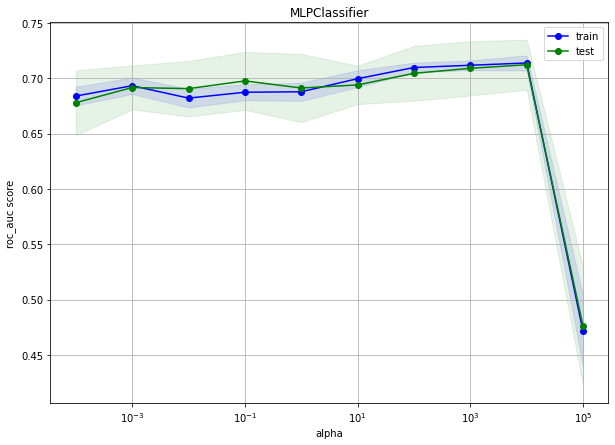

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(mlpc_params_set['alpha'], mlpc_CV.cv_results_['mean_train_score'], 'bo-', label='train')
plt.plot(mlpc_params_set['alpha'], mlpc_CV.cv_results_['mean_test_score'], 'go-', label='test')

plt.fill_between(mlpc_params_set['alpha'], 
                 mlpc_CV.cv_results_['mean_train_score']-mlpc_CV.cv_results_['std_train_score'], 
                 mlpc_CV.cv_results_['mean_train_score']+mlpc_CV.cv_results_['std_train_score'], 
                 color='blue', alpha=0.1)
plt.fill_between(mlpc_params_set['alpha'], 
                 mlpc_CV.cv_results_['mean_test_score']-mlpc_CV.cv_results_['std_test_score'], 
                 mlpc_CV.cv_results_['mean_test_score']+mlpc_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.grid()
plt.xlabel('alpha'), 
plt.ylabel('roc_auc score')
plt.title('MLPClassifier')
plt.xscale('log')
plt.legend()
plt.show()

Оценка качества на части (1000 элементов) тестовой выборки:

In [ ]:
mlpc_test_score = roc_auc_score(y_true=y_test[:test_part], y_score=mlpc_CV.best_estimator_.predict(X_test[:test_part]))
mlpc_test_score

0.5

##### 3 Сравнение

Сравню модели.

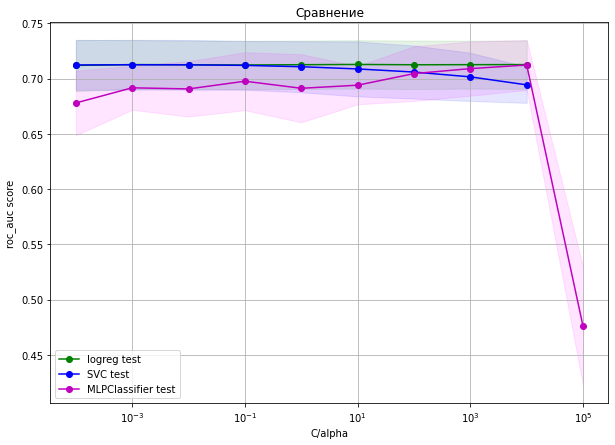

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(logreg_params_set['C'], logreg_CV.cv_results_['mean_test_score'], 'go-', label='logreg test')
plt.fill_between(logreg_params_set['C'], 
                 logreg_CV.cv_results_['mean_test_score']-logreg_CV.cv_results_['std_test_score'], 
                 logreg_CV.cv_results_['mean_test_score']+logreg_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.plot(svc_params_set['C'], svc_CV.cv_results_['mean_test_score'], 'bo-', label='SVC test')
plt.fill_between(svc_params_set['C'], 
                 svc_CV.cv_results_['mean_test_score']-svc_CV.cv_results_['std_test_score'], 
                 svc_CV.cv_results_['mean_test_score']+svc_CV.cv_results_['std_test_score'], 
                 color='blue', alpha=0.1)

plt.plot(mlpc_params_set['alpha'], mlpc_CV.cv_results_['mean_test_score'], 'mo-', label='MLPClassifier test')
plt.fill_between(mlpc_params_set['alpha'], 
                 mlpc_CV.cv_results_['mean_test_score']-mlpc_CV.cv_results_['std_test_score'], 
                 mlpc_CV.cv_results_['mean_test_score']+mlpc_CV.cv_results_['std_test_score'], 
                 color='magenta', alpha=0.1)

plt.grid()
plt.xlabel('C/alpha'), 
plt.ylabel('roc_auc score')
plt.title('Сравнение')
plt.xscale('log')
plt.legend()
plt.show()

Наилучшее качество в кросс-валидации:

In [ ]:
print('logreg best score:', logreg_CV.best_score_)
print('SVC best score:', svc_CV.best_score_)
print('MLPClassifier best score:', mlpc_CV.best_score_)

logreg best score: 0.7129001759427966
SVC best score: 0.7125971285634678
MLPClassifier best score: 0.7123729736837163


Отклонение:

In [ ]:
print('logreg std for best parameter:', logreg_CV.cv_results_['std_test_score'][5])
print('SVC std for best parameter:', svc_CV.cv_results_['std_test_score'][1])
print('MLPClassifier std for best parameter:', mlpc_CV.cv_results_['std_test_score'][8])

logreg std for best parameter: 0.02186876120240726
SVC std for best parameter: 0.022515888176235337
MLPClassifier std for best parameter: 0.02254986300340215


Качество на части (1000) тестовой выборки:

In [ ]:
print('logreg test score:', lr_test_score)
print('SVC test score:', svc_test_score)
print('MLPClassifier test score:', mlpc_test_score)

logreg test score: 0.6837360122584026
SVC test score: 0.5
MLPClassifier test score: 0.5


*Вывод:* Наилучшее среднее значение качества и наименьшее отклоненение у логистической регрессии. 

#### 4

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**Задание 4** (1 балл) 

Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

***Решение задания 4:***

In [ ]:
X_train.head()

,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,player_1,player_2,player_3,player_4,player_6,player_7,player_8,player_9,rad_gold_sum,dire_gold_sum,rad_lh_sum,dire_lh_sum,rad_gold_std,dire_gold_std,rad_lh_std,dire_lh_std
13674,3420,2310,3765,4450,3378,4927,5349,3936,13,2,23,32,3,42,47,37,130,149,19394,21242,19.728152,16.191356,1046.554232,759.302469
17458,4947,3257,5934,4500,3264,3917,4400,3830,30,21,47,38,21,27,49,48,146,146,21233,18371,12.890306,17.959955,1192.407749,507.613396
11599,3830,4631,5042,3459,2123,4683,3189,3443,39,50,56,6,7,48,13,8,152,110,19131,18364,22.685678,16.260381,1000.703233,1027.595718
9886,2523,4805,5571,2751,2006,4653,4436,3747,6,41,62,6,4,31,50,20,164,111,20647,16938,22.885803,17.022338,1246.425545,1131.953815
14010,5129,2523,6194,2222,4230,7731,2439,2279,49,16,57,3,52,37,14,13,131,144,18272,20458,22.444598,14.661514,1676.872637,1968.690489


У признаков разный порядок значений: от единиц для золота конкретного игрока до 20 тыс. для суммарного количества монстров. 

Масштаб данных влияет на алгоритмы: 

*   *Logistic Regression:* так как в методе фигурирует скалярное произведение вектора признаков на вектор весов, то слагаемые $w_ix_i$ с "большими" компонентами в векторе признаков будут давать больший вклад в общую сумму, что будет влиять на подбор соответствующих им весов $w_i$. При этом в [документации](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) сказано, что solvers 'liblinear', 'lbfgs', 'newton-cg' are robust to unscaled datasets. Однако при попытке использовать в предыдущем задании 'lbfgs' были ворнинги о том, что алгоритм не сходится с советом отмасштабировать данные. 

*   *SVC:* Аналогично - скалярное произведение вектора признаков на вектор весов в margin. Большие компоненты дают больший вклад в расстояние, доминируюя над признаками меньшего масштаба, и влияют на подбор весов. 

*   *MLPClassifier:* Во-первых, в нейронах в слоях происходят линейный преобразования над входными данными, что приводит к тому же, что и в предыдущих двух случаях. Во-вторых, неотмасштабированные данные могут приводить к затуханию градиента - градиент по весу, соответствующему большой по абс. величине компоненте становится близок к нулю, и этот вес не обновляется либо обновляется очень мало. 


Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

#### 5

**Задание 5** (1 балл) 

Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество алгоритмов и почему?

#### StandartScaler
Выберу масштабирование первым способом - с помощью StandartScaler. 

In [21]:
scaler = StandardScaler() 
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

Повторяю всё то же и с теми же настройками, что в 3 задании: 

In [ ]:
# Так же использую только часть данных для обучения моделей. 
data_part=4000

##### 5 StandartScaler LogReg
**5.1.1. Logistic Regression Classifier**

Буду подбирать значение для `C` - inverse of regularization strength. 

In [ ]:
# Инициализирую модель
logreg_model = LogisticRegression(penalty='l2', 
                                  tol=0.0001, 
                                  C=1.0, 
                                  solver='liblinear', 
                                  random_state=1234,
                                  max_iter=100)

# Тестируемые значения гиперпараметрa 
logreg_params_set = {
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4]
}

# Кросс-валидация
sc_logreg_CV = GridSearchCV(estimator=logreg_model,
                         param_grid=logreg_params_set,
                         scoring='roc_auc',
                         return_train_score=True)

sc_logreg_CV.fit(X_train_scaled[:data_part], y_train[:data_part])

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1234, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0, 1000.0,
                               10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
sc_logreg_CV.best_params_ , sc_logreg_CV.best_score_

({'C': 0.1}, 0.7127536613007244)

График среднего значения качества:

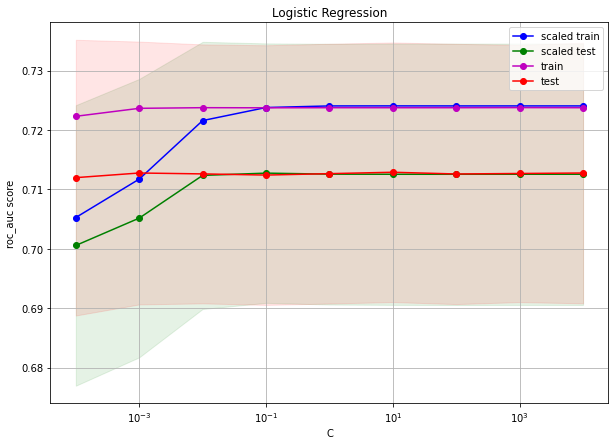

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(logreg_params_set['C'], sc_logreg_CV.cv_results_['mean_train_score'], 'bo-', label='scaled train')
plt.plot(logreg_params_set['C'], sc_logreg_CV.cv_results_['mean_test_score'], 'go-', label='scaled test')

plt.fill_between(logreg_params_set['C'], 
                 sc_logreg_CV.cv_results_['mean_test_score']-sc_logreg_CV.cv_results_['std_test_score'], 
                 sc_logreg_CV.cv_results_['mean_test_score']+sc_logreg_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.plot(logreg_params_set['C'], logreg_CV.cv_results_['mean_train_score'], 'mo-', label='train')
plt.plot(logreg_params_set['C'], logreg_CV.cv_results_['mean_test_score'], 'ro-', label='test')

plt.fill_between(logreg_params_set['C'], 
                 logreg_CV.cv_results_['mean_test_score']-logreg_CV.cv_results_['std_test_score'], 
                 logreg_CV.cv_results_['mean_test_score']+logreg_CV.cv_results_['std_test_score'], 
                 color='red', alpha=0.1)

plt.grid()
plt.xlabel('C'), 
plt.ylabel('roc_auc score')
plt.title('Logistic Regression')
plt.xscale('log')
plt.legend()
plt.show()

Изменилось на:

In [ ]:
sc_logreg_CV.best_score_ - logreg_CV.best_score_

-0.00014651464207227072

Оценка качества на части (1000 элементов) тестовой выборки:

In [ ]:
sc_lr_test_score = roc_auc_score(y_true=y_test[:test_part], y_score=sc_logreg_CV.best_estimator_.predict(X_test[:test_part]))
sc_lr_test_score

0.6316518037535357

На тестовых данных качество изменилось на:

In [ ]:
sc_lr_test_score - lr_test_score

-0.05208420850486695

##### 5 StandartScaler SVC
**5.1.2. C-Support Vector Classification**

Буду так же подбирать значение для `C` - inverse of regularization strength. 

Остальные параметры оставляю по умолчанию. 

In [ ]:
# Инициализирую модель
svc_model = SVC(C=1.0, 
                kernel='rbf',
                gamma='scale',
                shrinking=True,
                tol=0.001,
                random_state=1234)

# Тестируемые значения гиперпараметрa 
svc_params_set = {
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4]
}

# Кросс-валидация
sc_svc_CV = GridSearchCV(estimator=svc_model,
                      param_grid=svc_params_set,
                      scoring='roc_auc',
                      return_train_score=True,
                      verbose=3)

sc_svc_CV.fit(X_train_scaled[:data_part], y_train[:data_part])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.0001, score=(train=0.698, test=0.726), total=   0.9s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ........ C=0.0001, score=(train=0.707, test=0.681), total=   0.9s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ........ C=0.0001, score=(train=0.701, test=0.716), total=   0.9s
[CV] C=0.0001 ........................................................
[CV] ........ C=0.0001, score=(train=0.710, test=0.678), total=   0.9s
[CV] C=0.0001 ........................................................
[CV] ........ C=0.0001, score=(train=0.714, test=0.656), total=   0.9s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.698, test=0.726), total=   0.9s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.708, test=0.683), total=   0.9s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.701, test=0.715), total=   0.9s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.710, test=0.678), total=   0.9s
[CV] C=0.001 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1234, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0, 1000.0,
                               10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=3)

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
sc_svc_CV.best_params_ , sc_svc_CV.best_score_

({'C': 0.1}, 0.6977528160239432)

График среднего значения качества:

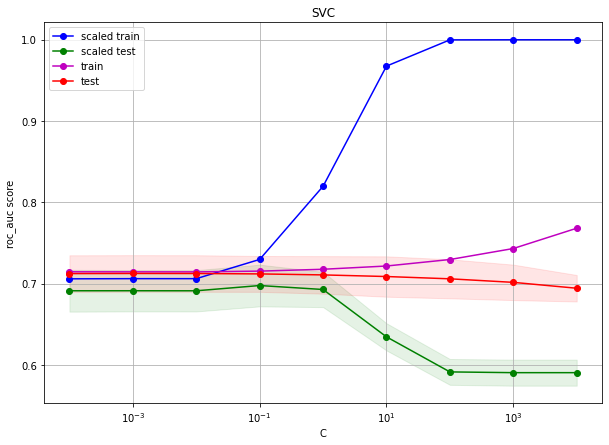

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(svc_params_set['C'], sc_svc_CV.cv_results_['mean_train_score'], 'bo-', label='scaled train')
plt.plot(svc_params_set['C'], sc_svc_CV.cv_results_['mean_test_score'], 'go-', label='scaled test')

plt.fill_between(svc_params_set['C'], 
                 sc_svc_CV.cv_results_['mean_test_score']-sc_svc_CV.cv_results_['std_test_score'], 
                 sc_svc_CV.cv_results_['mean_test_score']+sc_svc_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.plot(svc_params_set['C'], svc_CV.cv_results_['mean_train_score'], 'mo-', label='train')
plt.plot(svc_params_set['C'], svc_CV.cv_results_['mean_test_score'], 'ro-', label='test')

plt.fill_between(svc_params_set['C'], 
                 svc_CV.cv_results_['mean_test_score']-svc_CV.cv_results_['std_test_score'], 
                 svc_CV.cv_results_['mean_test_score']+svc_CV.cv_results_['std_test_score'], 
                 color='red', alpha=0.1)

plt.grid()
plt.xlabel('C'), 
plt.ylabel('roc_auc score')
plt.title('SVC')
plt.xscale('log')
plt.legend()
plt.show()

Качество изменилось на: 

In [ ]:
sc_svc_CV.best_score_ - svc_CV.best_score_

-0.014844312539524562

##### 5 StandartScaler MLPC
**5.1.3. Multi-layer Perceptron classifier**

Буду так же подбирать параметр, отвечающий за регуляризацию: `alpha`.

C остальными параметрами по умолчанию алгоритм не сходился, поэтому я попробовала заменить функцию активации на `logistic` вместо `relu` - заработало. 

In [ ]:
# Инициализирую модель
mlpc_model = MLPClassifier(alpha=0.0001,
                           activation='logistic',
                           solver='adam',
                           learning_rate='constant', 
                           learning_rate_init=0.001,
                           tol=0.0001,
                           max_iter=200,
                           random_state=1234)

# Тестируемые значения гиперпараметрa 
mlpc_params_set = {
'alpha': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4]
}

# Кросс-валидация
sc_mlpc_CV = GridSearchCV(estimator=mlpc_model,
                       param_grid=mlpc_params_set,
                       scoring='roc_auc',
                       return_train_score=True,
                       verbose=3)

sc_mlpc_CV.fit(X_train_scaled[:data_part], y_train[:data_part])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... alpha=0.0001, score=(train=0.716, test=0.743), total=   1.7s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .... alpha=0.0001, score=(train=0.726, test=0.703), total=   1.6s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV] .... alpha=0.0001, score=(train=0.719, test=0.730), total=   1.6s
[CV] alpha=0.0001 ....................................................
[CV] .... alpha=0.0001, score=(train=0.725, test=0.706), total=   1.4s
[CV] alpha=0.0001 ....................................................
[CV] .... alpha=0.0001, score=(train=0.731, test=0.680), total=   1.6s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.716, test=0.743), total=   1.7s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.726, test=0.703), total=   1.5s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.719, test=0.730), total=   1.6s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.725, test=0.706), total=   1.5s
[CV] alpha=0.001 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='logistic', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1234, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             para

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
sc_mlpc_CV.best_params_ , sc_mlpc_CV.best_score_

({'alpha': 0.1}, 0.7127599226102147)

График среднего значения качества:

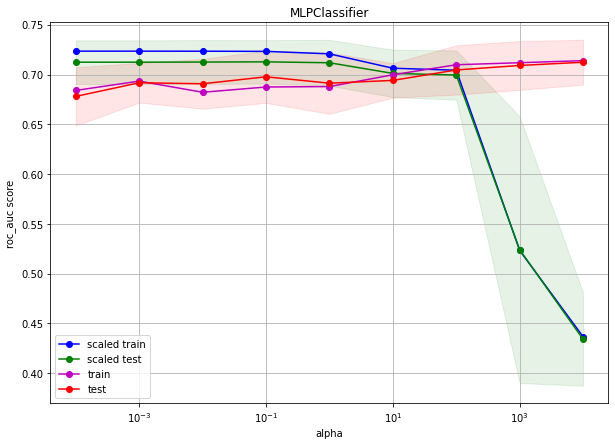

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(mlpc_params_set['alpha'], sc_mlpc_CV.cv_results_['mean_train_score'], 'bo-', label='scaled train')
plt.plot(mlpc_params_set['alpha'], sc_mlpc_CV.cv_results_['mean_test_score'], 'go-', label='scaled test')

plt.fill_between(mlpc_params_set['alpha'], 
                 sc_mlpc_CV.cv_results_['mean_test_score']-sc_mlpc_CV.cv_results_['std_test_score'], 
                 sc_mlpc_CV.cv_results_['mean_test_score']+sc_mlpc_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.plot(mlpc_params_set['alpha'], mlpc_CV.cv_results_['mean_train_score'][:-1], 'mo-', label='train')
plt.plot(mlpc_params_set['alpha'], mlpc_CV.cv_results_['mean_test_score'][:-1], 'ro-', label='test')

plt.fill_between(mlpc_params_set['alpha'], 
                 mlpc_CV.cv_results_['mean_test_score'][:-1]-mlpc_CV.cv_results_['std_test_score'][:-1], 
                 mlpc_CV.cv_results_['mean_test_score'][:-1]+mlpc_CV.cv_results_['std_test_score'][:-1], 
                 color='red', alpha=0.1)

plt.grid()
plt.xlabel('alpha'), 
plt.ylabel('roc_auc score')
plt.title('MLPClassifier')
plt.xscale('log')
plt.legend()
plt.show()

Изменилось на: 

In [ ]:
sc_mlpc_CV.best_score_ - mlpc_CV.best_score_ 

0.0003869489264983761

##### 5 StandartScaler Сравнение

Сравню модели. 

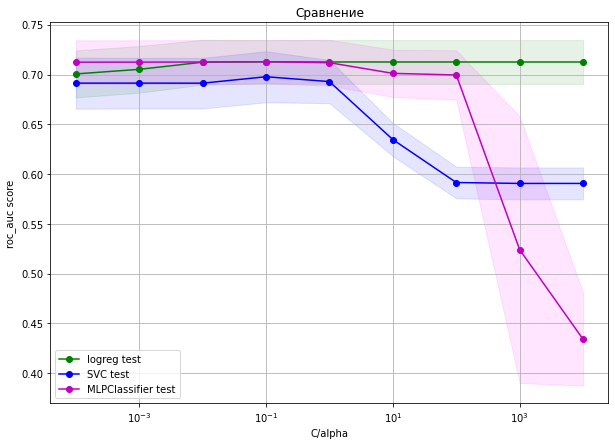

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(logreg_params_set['C'], sc_logreg_CV.cv_results_['mean_test_score'], 'go-', label='logreg test')
plt.fill_between(logreg_params_set['C'], 
                 sc_logreg_CV.cv_results_['mean_test_score']-sc_logreg_CV.cv_results_['std_test_score'], 
                 sc_logreg_CV.cv_results_['mean_test_score']+sc_logreg_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.plot(svc_params_set['C'], sc_svc_CV.cv_results_['mean_test_score'], 'bo-', label='SVC test')
plt.fill_between(svc_params_set['C'], 
                 sc_svc_CV.cv_results_['mean_test_score']-sc_svc_CV.cv_results_['std_test_score'], 
                 sc_svc_CV.cv_results_['mean_test_score']+sc_svc_CV.cv_results_['std_test_score'], 
                 color='blue', alpha=0.1)

plt.plot(mlpc_params_set['alpha'][:], sc_mlpc_CV.cv_results_['mean_test_score'][:], 'mo-', label='MLPClassifier test')
plt.fill_between(mlpc_params_set['alpha'][:], 
                 sc_mlpc_CV.cv_results_['mean_test_score'][:]-sc_mlpc_CV.cv_results_['std_test_score'][:], 
                 sc_mlpc_CV.cv_results_['mean_test_score'][:]+sc_mlpc_CV.cv_results_['std_test_score'][:], 
                 color='magenta', alpha=0.1)

plt.grid()
plt.xlabel('C/alpha'), 
plt.ylabel('roc_auc score')
plt.title('Сравнение')
plt.xscale('log')
plt.legend()
plt.show()

*Вывод:* Качество немного упало на логистической регрессии, значительно упало на SVC и немного возросло на MLPClassifier. Однако на SVM заметно уменьшилось время обучения (не замеряла, просто по ощущениям). 



In [ ]:
print('logreg best score:', sc_logreg_CV.best_score_)
print('SVC best score:', sc_svc_CV.best_score_)
print('MLPClassifier best score:', sc_mlpc_CV.best_score_)

logreg best score: 0.7127536613007244
SVC best score: 0.6977528160239432
MLPClassifier best score: 0.7127599226102147


In [ ]:
print('logreg std for best parameter:', sc_logreg_CV.cv_results_['std_test_score'][5])
print('SVC std for best parameter:', sc_svc_CV.cv_results_['std_test_score'][5])
print('MLPClassifier std for best parameter:', sc_mlpc_CV.cv_results_['std_test_score'][5])

logreg std for best parameter: 0.022001033941762154
SVC std for best parameter: 0.016735323583517463
MLPClassifier std for best parameter: 0.023774952615061296


Качество по прежнему наилучшее у логистической регрессии. Отклонения у моделей не изменились заметно. 

#### MinMax
*Попробую с MinMaxScaler*

In [ ]:
scaler = MinMaxScaler() 
scaler.fit(X_train)

X_train_mmscaled = scaler.transform(X_train) 
X_test_mmscaled = scaler.transform(X_test)

Повторяю всё то же и с теми же настройками, что в 3 задании: 

In [ ]:
# Так же использую только часть данных для обучения моделей. 
data_part=4000

##### 5 MinMax LogReg
**5.2.1. Logistic Regression Classifier**

Буду подбирать значение для `C` - inverse of regularization strength. 

In [ ]:
# Инициализирую модель
logreg_model = LogisticRegression(penalty='l2', 
                                  tol=0.0001, 
                                  C=1.0, 
                                  solver='liblinear', 
                                  random_state=1234,
                                  max_iter=100)

# Тестируемые значения гиперпараметрa 
logreg_params_set = {
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4]
}

# Кросс-валидация
mmsc_logreg_CV = GridSearchCV(estimator=logreg_model,
                         param_grid=logreg_params_set,
                         scoring='roc_auc',
                         return_train_score=True)

mmsc_logreg_CV.fit(X_train_mmscaled[:data_part], y_train[:data_part])

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1234, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0, 1000.0,
                               10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
mmsc_logreg_CV.best_params_ , mmsc_logreg_CV.best_score_

({'C': 10000.0}, 0.7125545516589339)

График среднего значения качества:

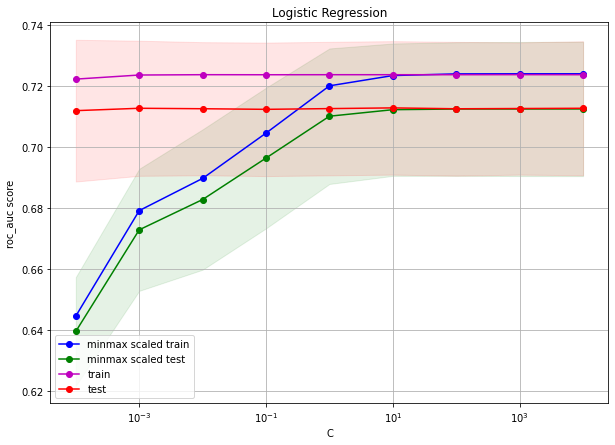

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(logreg_params_set['C'], mmsc_logreg_CV.cv_results_['mean_train_score'], 'bo-', label='minmax scaled train')
plt.plot(logreg_params_set['C'], mmsc_logreg_CV.cv_results_['mean_test_score'], 'go-', label='minmax scaled test')

plt.fill_between(logreg_params_set['C'], 
                 mmsc_logreg_CV.cv_results_['mean_test_score']-mmsc_logreg_CV.cv_results_['std_test_score'], 
                 mmsc_logreg_CV.cv_results_['mean_test_score']+mmsc_logreg_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.plot(logreg_params_set['C'], logreg_CV.cv_results_['mean_train_score'], 'mo-', label='train')
plt.plot(logreg_params_set['C'], logreg_CV.cv_results_['mean_test_score'], 'ro-', label='test')

plt.fill_between(logreg_params_set['C'], 
                 logreg_CV.cv_results_['mean_test_score']-logreg_CV.cv_results_['std_test_score'], 
                 logreg_CV.cv_results_['mean_test_score']+logreg_CV.cv_results_['std_test_score'], 
                 color='red', alpha=0.1)

plt.grid()
plt.xlabel('C'), 
plt.ylabel('roc_auc score')
plt.title('Logistic Regression')
plt.xscale('log')
plt.legend()
plt.show()

Изменилось на:

In [ ]:
mmsc_logreg_CV.best_score_ - logreg_CV.best_score_

-0.00034562428386275545

Оценка качества на части (1000 элементов) тестовой выборки:

In [ ]:
mmsc_lr_test_score = roc_auc_score(y_true=y_test[:test_part], y_score=mmsc_logreg_CV.best_estimator_.predict(X_test[:test_part]))
mmsc_lr_test_score

0.5657108793323492

На тестовых данных качество изменилось на:

In [ ]:
mmsc_lr_test_score - lr_test_score

-0.11802513292605343

##### 5 MinMax SVC
**5.2.2. C-Support Vector Classification**

Буду так же подбирать значение для `C` - inverse of regularization strength. 

Остальные параметры оставляю по умолчанию. 

In [ ]:
# Инициализирую модель
svc_model = SVC(C=1.0, 
                kernel='rbf',
                gamma='scale',
                shrinking=True,
                tol=0.001,
                random_state=1234)

# Тестируемые значения гиперпараметрa 
svc_params_set = {
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4]
}

# Кросс-валидация
mmsc_svc_CV = GridSearchCV(estimator=svc_model,
                      param_grid=svc_params_set,
                      scoring='roc_auc',
                      return_train_score=True,
                      verbose=3)

mmsc_svc_CV.fit(X_train_mmscaled[:data_part], y_train[:data_part])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.0001, score=(train=0.687, test=0.713), total=   0.9s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ........ C=0.0001, score=(train=0.696, test=0.665), total=   0.9s
[CV] C=0.0001 ........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ........ C=0.0001, score=(train=0.690, test=0.703), total=   0.9s
[CV] C=0.0001 ........................................................
[CV] ........ C=0.0001, score=(train=0.699, test=0.663), total=   0.9s
[CV] C=0.0001 ........................................................
[CV] ........ C=0.0001, score=(train=0.701, test=0.649), total=   0.9s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.688, test=0.713), total=   0.9s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.696, test=0.668), total=   0.9s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.689, test=0.701), total=   0.9s
[CV] C=0.001 .........................................................
[CV] ......... C=0.001, score=(train=0.698, test=0.664), total=   0.9s
[CV] C=0.001 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1234, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0, 1000.0,
                               10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=3)

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
mmsc_svc_CV.best_params_ , sc_svc_CV.best_score_

({'C': 1}, 0.6977528160239432)

График среднего значения качества:

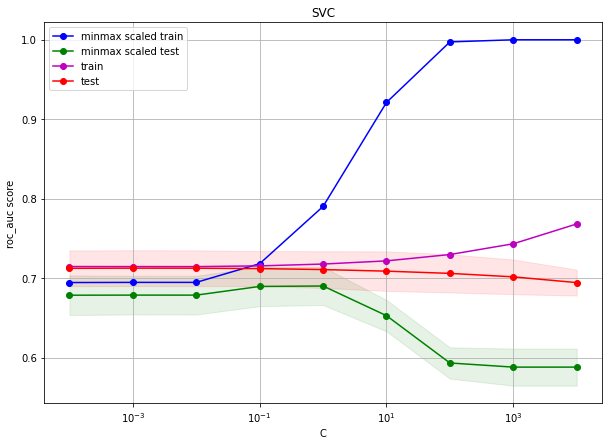

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(svc_params_set['C'], mmsc_svc_CV.cv_results_['mean_train_score'], 'bo-', label='minmax scaled train')
plt.plot(svc_params_set['C'], mmsc_svc_CV.cv_results_['mean_test_score'], 'go-', label='minmax scaled test')

plt.fill_between(svc_params_set['C'], 
                 mmsc_svc_CV.cv_results_['mean_test_score']-mmsc_svc_CV.cv_results_['std_test_score'], 
                 mmsc_svc_CV.cv_results_['mean_test_score']+mmsc_svc_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.plot(svc_params_set['C'], svc_CV.cv_results_['mean_train_score'], 'mo-', label='train')
plt.plot(svc_params_set['C'], svc_CV.cv_results_['mean_test_score'], 'ro-', label='test')

plt.fill_between(svc_params_set['C'], 
                 svc_CV.cv_results_['mean_test_score']-svc_CV.cv_results_['std_test_score'], 
                 svc_CV.cv_results_['mean_test_score']+svc_CV.cv_results_['std_test_score'], 
                 color='red', alpha=0.1)

plt.grid()
plt.xlabel('C'), 
plt.ylabel('roc_auc score')
plt.title('SVC')
plt.xscale('log')
plt.legend()
plt.show()

Качестсво изменилось на: 

In [ ]:
mmsc_svc_CV.best_score_ - svc_CV.best_score_

-0.022449299046402693

##### 5 MinMax MLPC
**5.2.3. Multi-layer Perceptron classifier**

Буду так же подбирать параметр, отвечающий за регуляризацию: `alpha`.

C остальными параметрами по умолчанию алгоритм не сходился, поэтому я попробовала заменить функцию активации на `logistic` вместо `relu` - заработало. 

In [ ]:
# Инициализирую модель
mlpc_model = MLPClassifier(alpha=0.0001,
                           activation='logistic',
                           solver='adam',
                           learning_rate='constant', 
                           learning_rate_init=0.001,
                           tol=0.0001,
                           max_iter=200,
                           random_state=1234)

# Тестируемые значения гиперпараметрa 
mlpc_params_set = {
'alpha': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4]
}

# Кросс-валидация
mmsc_mlpc_CV = GridSearchCV(estimator=mlpc_model,
                       param_grid=mlpc_params_set,
                       scoring='roc_auc',
                       return_train_score=True,
                       verbose=3)

mmsc_mlpc_CV.fit(X_train_mmscaled[:data_part], y_train[:data_part])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... alpha=0.0001, score=(train=0.709, test=0.742), total=   4.4s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] .... alpha=0.0001, score=(train=0.721, test=0.703), total=   4.3s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


[CV] .... alpha=0.0001, score=(train=0.714, test=0.721), total=   4.1s
[CV] alpha=0.0001 ....................................................
[CV] .... alpha=0.0001, score=(train=0.722, test=0.705), total=   5.4s
[CV] alpha=0.0001 ....................................................
[CV] .... alpha=0.0001, score=(train=0.727, test=0.674), total=   4.4s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.709, test=0.742), total=   4.2s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.721, test=0.703), total=   4.2s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.714, test=0.721), total=   4.1s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.722, test=0.705), total=   5.5s
[CV] alpha=0.001 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='logistic', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1234, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             para

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
mmsc_mlpc_CV.best_params_ , sc_mlpc_CV.best_score_

({'alpha': 0.001}, 0.7127599226102147)

График среднего значения качества:

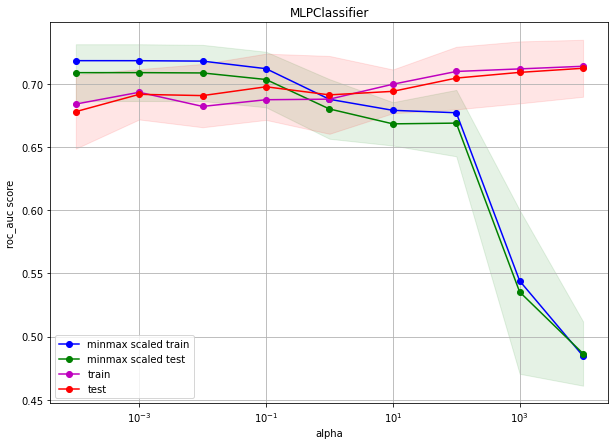

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(mlpc_params_set['alpha'], mmsc_mlpc_CV.cv_results_['mean_train_score'], 'bo-', label='minmax scaled train')
plt.plot(mlpc_params_set['alpha'], mmsc_mlpc_CV.cv_results_['mean_test_score'], 'go-', label='minmax scaled test')

plt.fill_between(mlpc_params_set['alpha'], 
                 mmsc_mlpc_CV.cv_results_['mean_test_score']-mmsc_mlpc_CV.cv_results_['std_test_score'], 
                 mmsc_mlpc_CV.cv_results_['mean_test_score']+mmsc_mlpc_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.plot(mlpc_params_set['alpha'], mlpc_CV.cv_results_['mean_train_score'][:-1], 'mo-', label='train')
plt.plot(mlpc_params_set['alpha'], mlpc_CV.cv_results_['mean_test_score'][:-1], 'ro-', label='test')

plt.fill_between(mlpc_params_set['alpha'], 
                 mlpc_CV.cv_results_['mean_test_score'][:-1]-mlpc_CV.cv_results_['std_test_score'][:-1], 
                 mlpc_CV.cv_results_['mean_test_score'][:-1]+mlpc_CV.cv_results_['std_test_score'][:-1], 
                 color='red', alpha=0.1)

plt.grid()
plt.xlabel('alpha'), 
plt.ylabel('roc_auc score')
plt.title('MLPClassifier')
plt.xscale('log')
plt.legend()
plt.show()

Качество изменилось на: 

In [ ]:
mmsc_mlpc_CV.best_score_ - mlpc_CV.best_score_ 

-0.0034424679577487183

##### MinMax Сравнение

Сравню модели. 

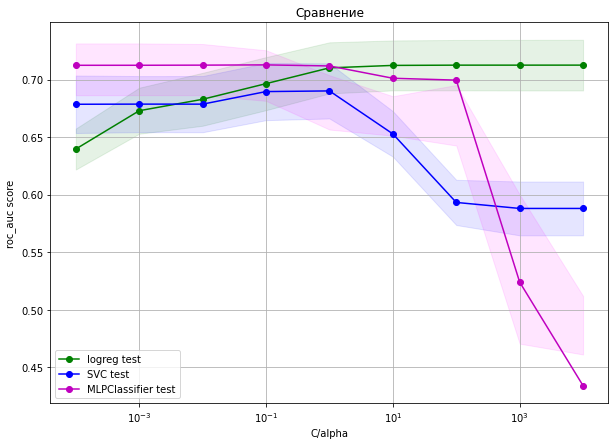

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(logreg_params_set['C'], mmsc_logreg_CV.cv_results_['mean_test_score'], 'go-', label='logreg test')
plt.fill_between(logreg_params_set['C'], 
                 mmsc_logreg_CV.cv_results_['mean_test_score']-mmsc_logreg_CV.cv_results_['std_test_score'], 
                 mmsc_logreg_CV.cv_results_['mean_test_score']+mmsc_logreg_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.plot(svc_params_set['C'], mmsc_svc_CV.cv_results_['mean_test_score'], 'bo-', label='SVC test')
plt.fill_between(svc_params_set['C'], 
                 mmsc_svc_CV.cv_results_['mean_test_score']-mmsc_svc_CV.cv_results_['std_test_score'], 
                 mmsc_svc_CV.cv_results_['mean_test_score']+mmsc_svc_CV.cv_results_['std_test_score'], 
                 color='blue', alpha=0.1)

plt.plot(mlpc_params_set['alpha'][:], sc_mlpc_CV.cv_results_['mean_test_score'][:], 'mo-', label='MLPClassifier test')
plt.fill_between(mlpc_params_set['alpha'][:], 
                 mmsc_mlpc_CV.cv_results_['mean_test_score'][:]-mmsc_mlpc_CV.cv_results_['std_test_score'][:], 
                 mmsc_mlpc_CV.cv_results_['mean_test_score'][:]+mmsc_mlpc_CV.cv_results_['std_test_score'][:], 
                 color='magenta', alpha=0.1)

plt.grid()
plt.xlabel('C/alpha'), 
plt.ylabel('roc_auc score')
plt.title('Сравнение')
plt.xscale('log')
plt.legend()
plt.show()

*Вывод:* Качество так же немного упало на логистической регрессии, еще больше упало на SVC и немного немного упало на MLPClassifier. 



In [ ]:
print('logreg best score:', mmsc_logreg_CV.best_score_)
print('SVC best score:', mmsc_svc_CV.best_score_)
print('MLPClassifier best score:', mmsc_mlpc_CV.best_score_)

logreg best score: 0.7125545516589339
SVC best score: 0.6901478295170651
MLPClassifier best score: 0.7089305057259676


#### 5 Вывод

Качество по прежнему наилучшее у логистической регрессии.


---

Мне кажется, такой эффект со снижением качества моделей может быть из-за неточностей их настройки и пока не известных мне особенностей solver алгоритмов. Однако, надеюсь, стандартизированные данные позволят перебрать больше параметров моделей и значительно улучшить качетсво (в задании 3, без масштабирования данных, некоторые комбинации параметров моделей вели к ошибками и ворнингам про то, что алгоритм не сходится). Проверю это в задании 6. 

#### 6

**Задание 6** (1.5 балла) 

Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма. Какие гиперпараметры вы настраивали? Удалось ли улучшить качество алгоритмов?

##### 6 LogReg 

**6.1. Logistic Regression Classifier**

Так как разные solver-ы поддерживают разные регуляризации, и перебирать комбинации становится сложно по причине того, что некоторые комбинации не работают, я сделаю несколько переборов параметоов: 

1. `solver`=`liblinear`, переберу силу регуляризации `C`, регуляризацию `penalty` (l2, l1) и добавление свободного члена `fit_intercept` (True, False).

2. `solver` = `saga` (единственный, поддерживающий elasticnet регуляризацию), переберу `C`, `penalty` (l1, l2, elasticnet), `l1_ratio` (для elastic net) и `fit_intercept`. 

Использую данные, стандартизированные с `StandartScaler`.


* Первая, с `liblinear`:

In [ ]:
logreg_model = LogisticRegression(tol=0.0001, 
                                  solver='liblinear', 
                                  random_state=1234,
                                  max_iter=100)

f1_logreg_params_set = {
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4],
'penalty':['l1', 'l2'],
'fit_intercept':[True, False]
}

f1_logreg_CV = GridSearchCV(estimator=logreg_model,
                         param_grid=f1_logreg_params_set,
                         scoring='roc_auc',
                         return_train_score=True)

f1_logreg_CV.fit(X_train_scaled[:data_part], y_train[:data_part])

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1234, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0, 1000.0,
                               10000.0],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
f1_logreg_CV.best_params_ , f1_logreg_CV.best_score_

({'C': 0.1, 'fit_intercept': False, 'penalty': 'l1'}, 0.7149676603364827)

По сравнению с подобранной в 3 задании (не стандартизированные данные, `C=10`, `penalty='l2'`, `solver`=`liblinear`) качество увеличилось на: 

In [ ]:
f1_logreg_CV.best_score_ - logreg_CV.best_score_

0.002067484393686092

* Вторая, с `saga`:

In [ ]:
logreg_model = LogisticRegression(tol=0.0001, 
                                  solver='saga', 
                                  random_state=1234,
                                  max_iter=100)

f2_logreg_params_set = {
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4],
'penalty':['l1', 'l2', 'elasticnet'],
'fit_intercept':[True, False],
'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

f2_logreg_CV = GridSearchCV(estimator=logreg_model,
                         param_grid=f2_logreg_params_set,
                         scoring='roc_auc',
                         return_train_score=True)

f2_logreg_CV.fit(X_train_scaled[:data_part], y_train[:data_part])

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
f2_logreg_CV.best_params_ , f2_logreg_CV.best_score_

({'C': 0.01, 'fit_intercept': True, 'l1_ratio': 0.5, 'penalty': 'elasticnet'},
 0.7152005810495208)

По сравнению с подобранной в 3 задании (не стандартизированные данные, `C=10`, `penalty='l2'`, `solver`=`liblinear`) качество увеличилось на: 

In [ ]:
f2_logreg_CV.best_score_ - logreg_CV.best_score_

0.002300405106724135

По сравнению с предыдущей (`liblinear`) качество увеличилось на:

In [ ]:
f2_logreg_CV.best_score_ - f1_logreg_CV.best_score_

0.00023292071303804285

In [ ]:
f2_lr_test_score = roc_auc_score(y_true=y_test[:test_part], y_score=f2_logreg_CV.best_estimator_.predict(X_test[:test_part]))
f2_lr_test_score

0.6336241903413069

Попробую взять для этой удачной модели еще сетку мельче "возле" оптимальных `C`, `l1_ratio`

In [ ]:
logreg_model = LogisticRegression(tol=0.0001, 
                                  solver='saga', 
                                  penalty='elasticnet',
                                  fit_intercept=True,
                                  random_state=1234,
                                  max_iter=100)

f3_logreg_params_set = {
'C': [0.005, 0.008, 0.01, 0.012, 0.015],
'l1_ratio':[0.450, 0.475, 0.5, 0.525, 0.550]
}

f3_logreg_CV = GridSearchCV(estimator=logreg_model,
                         param_grid=f3_logreg_params_set,
                         scoring='roc_auc',
                         return_train_score=True)

f3_logreg_CV.fit(X_train_scaled[:data_part], y_train[:data_part])

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=1234, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.005, 0.008, 0.01, 0.012, 0.015],
                         'l1_ratio': [0.45, 0.475, 0.5, 0.525, 0.55]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
f3_logreg_CV.best_params_ , f3_logreg_CV.best_score_

({'C': 0.008, 'l1_ratio': 0.45}, 0.7153233027155299)

По сравнению с подобранной в 3 задании (не стандартизированные данные, `C=10`, `penalty='l2'`, `solver`=`liblinear`) качество увеличилось на: 

In [ ]:
f3_logreg_CV.best_score_ - logreg_CV.best_score_

0.002423126772733264

По сравнению с предыдущей (`saga`) качество увеличилось на:

In [ ]:
f3_logreg_CV.best_score_ - f2_logreg_CV.best_score_

0.00012272166600912904

Небольшое улучшение есть, оставлю ёё. 

*Итак,* лучшая полученная для логистической регрессии модель:
```
solver='saga'
penalty='elasticnet'
fit_intercept=True
C=0.008
l1_ratio=0.45

```

Качество: 0.7153233, улучшилось на 0.0001227 в сравнении с моделью из задания 3. 

##### 6 SVC

**6.2. C-Support Vector Classification**

Буду перебирать ядра `kernel` и силу регуляризации `C`. 

In [ ]:
svc_CV.best_params_, svc_CV.best_score_

({'C': 0.001}, 0.7125971285634678)

In [ ]:
# Инициализирую модель
svc_model = SVC(C=1.0, 
                kernel='rbf',
                gamma='scale',
                shrinking=True,
                tol=0.001,
                random_state=1234)

# Тестируемые значения гиперпараметрa 
f_svc_params_set = {
'kernel':['linear', 'poly', 'sigmoid', 'rbf'],
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2]
}

# Кросс-валидация
f_sc_svc_CV = GridSearchCV(estimator=svc_model,
                      param_grid=f_svc_params_set,
                      scoring='roc_auc',
                      return_train_score=True,
                      verbose=3)

f_sc_svc_CV.fit(X_train_scaled[:data_part], y_train[:data_part])

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.0001, kernel=linear, score=(train=0.691, test=0.722), total=   0.7s
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  C=0.0001, kernel=linear, score=(train=0.695, test=0.702), total=   0.7s
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  C=0.0001, kernel=linear, score=(train=0.696, test=0.706), total=   0.7s
[CV] C=0.0001, kernel=linear .........................................
[CV]  C=0.0001, kernel=linear, score=(train=0.702, test=0.676), total=   0.7s
[CV] C=0.0001, kernel=linear .........................................
[CV]  C=0.0001, kernel=linear, score=(train=0.705, test=0.669), total=   0.7s
[CV] C=0.0001, kernel=poly ...........................................
[CV]  C=0.0001, kernel=poly, score=(train=0.698, test=0.717), total=   0.8s
[CV] C=0.0001, kernel=poly ...........................................
[CV]  C=0.0001, kernel=poly, score=(train=0.702, test=0.697), total=   0.8s
[CV] C=0.0001, kernel=poly ...........................................
[CV]  C=0.0001, kernel=poly, score=(train=0.704, test=0.700), total=   0.8s
[CV] C=0.0001, kernel=poly ...........................................
[CV]  C=0.0001, kernel=poly, score=(train=0.709, test=0.672), total=   0.8s
[CV] C=0.0001, kernel=poly .........

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  8.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1234, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=3)

In [ ]:
f_sc_svc_CV.cv_results_['mean_test_score']

array([0.69502509, 0.68882725, 0.69498022, 0.68683014, 0.70093589,
       0.68894106, 0.6950171 , 0.68697597, 0.70676094, 0.68976575,
       0.69717303, 0.68703207, 0.70655425, 0.69065209, 0.70597647,
       0.69318816, 0.70622808, 0.6679313 , 0.60683061, 0.68111149,
       0.70615594, 0.61492541, 0.58630532, 0.62428559, 0.70613992,
       0.58706414, 0.58351985, 0.58103046])

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
f_sc_svc_CV.best_params_ , f_sc_svc_CV.best_score_

({'C': 0.01, 'kernel': 'linear'}, 0.7067609404318833)

По сравнению с подобранной в 3 задании (не стандартизированные данные, `C=0.001`, `kernel='rbf'`) качество изменилось на: 

In [ ]:
f_sc_svc_CV.best_score_ - svc_CV.best_score_

-0.0058361881315844855

*Итак,* SVC всё еще не поддается. Качество улучшить не удалось, наилучшей остается модель из третьего задания. Однако здесь качество хотя бы повысилось относительно модели на стандартизированных данных из 5 задания (она была хуже модели из 3 задания на 0.0148).

##### 6 MLPC

**6.3. Multi-layer Perceptron classifier**

Буду менять функции активации `activation`, число слоев и количество нейронов в них `hidden_layer_sizes` и силу регуляризации `alpha`.


In [ ]:
# Инициализирую модель
mlpc_model = MLPClassifier(alpha=0.0001,
                           solver='adam',
                           learning_rate='constant', 
                           learning_rate_init=0.001,
                           tol=0.0001,
                           max_iter=1000,
                           random_state=1234)


# Тестируемые значения гиперпараметров
f_mlpc_params_set = {
'activation':['logistic', 'tanh', 'relu'],
'alpha': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4],
'hidden_layer_sizes':[(100,), (50,),
                      (50, 10), (100, 50), 
                      (100, 50, 10)]
}

# Кросс-валидация
f_mlpc_CV = GridSearchCV(estimator=mlpc_model,
                       param_grid=f_mlpc_params_set,
                       scoring='roc_auc',
                       return_train_score=True,
                       verbose=3)

f_mlpc_CV.fit(X_train_scaled[:data_part], y_train[:data_part])

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.716, test=0.743), total=   1.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.726, test=0.703), total=   1.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.719, test=0.730), total=   1.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.725, test=0.706), total=   1.4s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.731, test=0.680), total=   1.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,) .....


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.902, test=0.665), total=  15.4s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,) .....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.726, test=0.703), total=   0.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,) .....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.719, test=0.729), total=   0.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,) .....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.726, test=0.706), total=   1.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,) .....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.731, test=0.681), total=   1.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10) ..


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=0.943, test=0.638), total=  11.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10) ..


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=0.948, test=0.632), total=  11.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10) ..
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=0.720, test=0.728), total=   1.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10) ..


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=0.950, test=0.620), total=  11.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10) ..
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=0.732, test=0.682), total=   1.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(train=0.716, test=0.743), total=   2.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(train=0.727, test=0.702), total=   2.9s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(train=0.719, test=0.729), total=   2.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50) .
[CV]  activation=logistic, alpha=0.0001, hidden_layer_siz

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 10), score=(train=0.999, test=0.581), total=  51.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 10) 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 50, 10), score=(train=0.983, test=0.611), total=  45.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100,) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), score=(train=0.716, test=0.743), total=   1.6s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100,) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), score=(train=0.726, test=0.703), total=   1.5s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100,) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), score=(train=0.719, test=0.730), total=   1.6s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100,) .....
[CV]  activation=logistic, alpha=0.001, hidden_layer_siz

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.900, test=0.668), total=  15.5s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(50,) ......
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.726, test=0.703), total=   0.9s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(50,) ......
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.719, test=0.729), total=   0.9s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(50,) ......
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.726, test=0.706), total=   1.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(50,) ......
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.731, test=0.681), total=   1.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10) ...


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=0.944, test=0.634), total=  12.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10) ...


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=0.942, test=0.636), total=  12.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10) ...
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=0.720, test=0.728), total=   1.2s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10) ...


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=0.950, test=0.612), total=  12.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10) ...
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=0.732, test=0.682), total=   1.2s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=0.716, test=0.743), total=   2.3s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=0.727, test=0.702), total=   2.8s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=0.719, test=0.729), total=   2.2s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 50) ..
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=(10

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=0.918, test=0.636), total=  12.0s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 10) ....
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=0.720, test=0.728), total=   1.2s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 10) ....
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=0.729, test=0.705), total=   1.7s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 10) ....
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=0.731, test=0.682), total=   1.1s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=0.716, test=0.743), total=   2.3s
[CV] activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50) ...
[CV]  activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 50), 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.596), total=  33.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.645), total=  32.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,) ........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.641), total=  33.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,) ........
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.620), total=  31.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,) ........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.627), total=  33.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,) .........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.988, test=0.632), total=  18.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,) .........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.992, test=0.612), total=  18.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,) .........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.993, test=0.637), total=  18.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,) .........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.993, test=0.587), total=  18.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,) .........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.993, test=0.586), total=  18.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10) ......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.624), total=  14.9s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10) ......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.631), total=  14.9s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10) ......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.648), total=  15.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10) ......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.578), total=  15.0s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10) ......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.619), total=  14.9s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.614), total=  21.7s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.646), total=  20.8s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.615), total=  20.9s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.596), total=  20.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50) .....
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(tr

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.594), total=  30.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(100,) .........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.636), total=  29.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(100,) .........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.641), total=  30.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(100,) .........
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.620), total=  27.9s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(100,) .........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.627), total=  29.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50,) ..........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.988, test=0.633), total=  18.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50,) ..........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.992, test=0.611), total=  18.4s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50,) ..........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.993, test=0.637), total=  18.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50,) ..........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.993, test=0.587), total=  18.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50,) ..........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.993, test=0.585), total=  18.7s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10) .......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.626), total=  14.9s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10) .......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.631), total=  15.0s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10) .......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.647), total=  14.9s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10) .......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.578), total=  14.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10) .......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.619), total=  14.9s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.614), total=  19.6s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.644), total=  20.8s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.614), total=  21.1s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.596), total=  20.5s
[CV] activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), score=(train=1.000, test=0.601), total=  29.9s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(100,) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), score=(train=1.000, test=0.649), total=  29.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(100,) ..........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), score=(train=1.000, test=0.635), total=  30.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(100,) ..........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), score=(train=1.000, test=0.614), total=  27.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(100,) ..........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), score=(train=1.000, test=0.627), total=  29.9s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50,) ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.989, test=0.635), total=  18.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50,) ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.990, test=0.606), total=  18.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50,) ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.992, test=0.638), total=  18.6s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50,) ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.991, test=0.589), total=  18.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50,) ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.992, test=0.580), total=  18.5s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10) ........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.625), total=  15.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10) ........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.640), total=  14.9s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10) ........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=0.999, test=0.646), total=  14.9s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10) ........
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.579), total=  14.4s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10) ........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.615), total=  14.8s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.612), total=  22.0s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.646), total=  21.3s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.605), total=  21.9s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.605), total=  21.4s
[CV] activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, t

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), score=(train=1.000, test=0.632), total=  29.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(100,) ...........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), score=(train=1.000, test=0.618), total=  29.8s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(100,) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), score=(train=1.000, test=0.608), total=  27.6s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(100,) ...........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(100,), score=(train=1.000, test=0.621), total=  26.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50,) ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), score=(train=0.978, test=0.634), total=  18.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50,) ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), score=(train=0.977, test=0.624), total=  18.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50,) ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), score=(train=0.980, test=0.629), total=  18.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50,) ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), score=(train=0.979, test=0.594), total=  18.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50,) ............


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50,), score=(train=0.978, test=0.608), total=  18.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10) .........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.609), total=  14.4s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10) .........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10), score=(train=0.999, test=0.630), total=  13.3s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10) .........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10), score=(train=0.999, test=0.616), total=  13.5s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10) .........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.587), total=  12.9s
[CV] activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10) .........
[CV]  activation=tanh, alpha=0.1, hidden_layer_sizes=(50, 10), score=(train=0.998, test=0.601), to

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.999, test=0.639), total=  18.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(100,) ........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.997, test=0.626), total=  18.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(100,) ........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.997, test=0.620), total=  18.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(100,) ........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.998, test=0.587), total=  20.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(100,) ........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=0.998, test=0.606), total=  21.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(50,) .........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.915, test=0.648), total=   9.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(50,) .........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.923, test=0.640), total=  10.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(50,) .........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.920, test=0.632), total=   9.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(50,) .........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.931, test=0.638), total=  11.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(50,) .........
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=0.933, test=0.635)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=0.997, test=0.618), total=  10.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 10) ......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=0.996, test=0.600), total=  11.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 10) ......
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=0.999, test=0.593), total=  10.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 10) ......
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 10), score=(train=0.995, test=0.584), total=   9.0s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.633), total=  15.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.671), total=  16.2s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50) .....
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 50), score=(trai

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), score=(train=0.998, test=0.623), total=  18.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,) .........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), score=(train=0.997, test=0.618), total=  17.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,) .........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), score=(train=0.999, test=0.593), total=  17.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,) .........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), score=(train=0.999, test=0.613), total=  18.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,) ..........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.926, test=0.647), total=  11.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,) ..........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.926, test=0.641), total=  10.8s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,) ..........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.923, test=0.637), total=   9.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,) ..........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.928, test=0.651), total=  10.8s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,) ..........
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), score=(train=0.939, test=0.630), tota

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=1.000, test=0.594), total=  11.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50, 10) .......


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50, 10), score=(train=0.998, test=0.581), total=  11.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.619), total=  12.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.663), total=  12.9s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.624), total=  11.9s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.615), total=  12.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50) ......
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100, 50), score=(train=1.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), score=(train=0.997, test=0.623), total=  18.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,) ..........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), score=(train=0.997, test=0.624), total=  17.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,) ..........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), score=(train=0.996, test=0.585), total=  16.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,) ..........


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), score=(train=0.998, test=0.622), total=  18.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,) ...........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.925, test=0.655), total=  10.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,) ...........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.924, test=0.643), total=  10.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,) ...........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.920, test=0.633), total=   9.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,) ...........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.925, test=0.639), total=  11.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,) ...........
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), score=(train=0.934, test=0.618), total=  10

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50, 10), score=(train=0.999, test=0.564), total=  11.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.612), total=  12.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.672), total=  12.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.628), total=  12.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, test=0.615), total=  12.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50) .......
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100, 50), score=(train=1.000, t

[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed: 73.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_s...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

Лучший набор параметров и значение критерия качества на нём:

In [ ]:
f_mlpc_CV.best_params_ , f_mlpc_CV.best_score_

({'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (100,)},
 0.7127599226102147)

По сравнению с подобранной в 3 задании (не стандартизированные данные, `alpha=10000`, `activation=logistic`, `solver=adam`, `hidden_layer_sizes=(100,)`) качество увеличилось на: 

In [ ]:
f_mlpc_CV.best_score_ - mlpc_CV.best_score_ 

0.0003869489264983761

Ура, тут хотя бы немного удалось улучшить!

*Итогo,* лучшая модель для MLPClassifier:

```
activation='logistic'
alpha=0.1
hidden_layer_sizes=(100,)
solver='adam'
learning_rate='constant'
learning_rate_init=0.001
tol=0.0001
max_iter=1000
```

Качество: 0.7127599226102147

#### Лучшие модели по итогам 6 задания

Для SVC возьму наилучшую на стандартизированных данных.

In [22]:
best_logreg_model = LogisticRegression(tol=0.0001, 
                                  solver='saga',
                                  penalty='elasticnet',
                                  fit_intercept=True,
                                  C=0.008,
                                  l1_ratio=0.45,
                                  max_iter=500)
best_logreg_model.fit(X_train_scaled[:4000], y_train[:4000])

best_mlpc_model = MLPClassifier(activation='logistic',
                                alpha=0.1,
                                hidden_layer_sizes=(100,),
                                solver='adam',
                                learning_rate='constant',
                                learning_rate_init=0.001,
                                tol=0.0001,
                                max_iter=1000)
best_mlpc_model.fit(X_train_scaled[:4000], y_train[:4000])

best_svc_model = SVC(C=0.01, 
                 kernel='linear',
                 gamma='scale',
                 tol=0.001,
                 random_state=1234)
best_svc_model.fit(X_train_scaled[:4000], y_train[:4000])

# чтобы не перезапускать ячейки с кросс-валидацией, но иметь под рукой значения качства оттуда
best_logreg_score = 0.7153233027155299
best_svc_score = 0.7067609404318833
best_mlpc_score = 0.7127599226102147

### Добавление категориальных признаков в модели

#### 7

**Задание 7** (1 балл) 

Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

***Решение задания 7:***

Теперь возьму все данные, а не 4000.

Пример кода подсмотрен [здесь](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py).

 
##### 7 LogReg
**7.1 Logistic Regression**

In [ ]:
best_logreg_model = LogisticRegression(tol=0.0001, 
                                  solver='saga',
                                  penalty='elasticnet',
                                  fit_intercept=True,
                                  C=0.008,
                                  l1_ratio=0.45,
                                  max_iter=500)



lr_train_sizes, lr_train_scores, lr_test_scores = learning_curve(estimator = best_logreg_model, 
                                                                 X=X_train_scaled, y=y_train,
                                                                 scoring='roc_auc',
                                                                 train_sizes=[0.2, 0.3, 0.5, 0.7, 1.],
                                                                 verbose=3)

lr_train_scores_mean = np.mean(lr_train_scores, axis=1)
lr_train_scores_std = np.std(lr_train_scores, axis=1)
lr_test_scores_mean = np.mean(lr_test_scores, axis=1)
lr_test_scores_std = np.std(lr_test_scores, axis=1)

[learning_curve] Training set sizes: [ 3196  4794  7991 11188 15983]
[CV]  ................................................................
[CV] ................ , score=(train=0.696, test=0.717), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.701, test=0.717), total=   0.1s
[CV]  ................................................................
[CV] ................ , score=(train=0.701, test=0.718), total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................ , score=(train=0.703, test=0.718), total=   0.1s
[CV]  ................................................................
[CV] ................ , score=(train=0.705, test=0.720), total=   0.2s
[CV]  ................................................................
[CV] ................ , score=(train=0.726, test=0.692), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.720, test=0.694), total=   0.1s
[CV]  ................................................................
[CV] ................ , score=(train=0.712, test=0.694), total=   0.1s
[CV]  ................................................................
[CV] ................ , score=(train=0.712, test=0.694), total=   0.1s
[CV]  ................................................................
[CV] ................ , score=(train=0.712, test=0.695), total=   0.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.6s finished


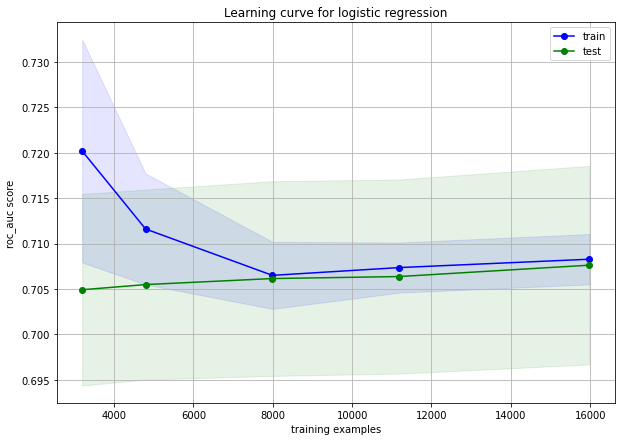

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(lr_train_sizes, lr_train_scores_mean, 'bo-', label="train")
plt.plot(lr_train_sizes, lr_test_scores_mean, 'go-', label="test")

plt.fill_between(lr_train_sizes, 
                 lr_train_scores_mean - lr_train_scores_std,
                 lr_train_scores_mean + lr_train_scores_std, 
                 alpha=0.1, color="blue")
plt.fill_between(lr_train_sizes, 
                 lr_test_scores_mean - lr_test_scores_std,
                 lr_test_scores_mean + lr_test_scores_std, 
                 alpha=0.1, color="green")

plt.grid()
plt.xlabel('training examples'), 
plt.ylabel('roc_auc score')
plt.title('Learning curve for logistic regression')
plt.legend()
plt.show()

 
##### 7 SVC
**7.2 C-Support Vector Classification**

In [ ]:
best_svc_model = SVC(C=0.001, 
                     kernel='rbf',
                     gamma='scale',
                     tol=0.001,
                     random_state=1234)



svc_train_sizes, svc_train_scores, svc_test_scores = learning_curve(estimator = best_svc_model, 
                                                                    X=X_train, y=y_train,
                                                                    scoring='roc_auc',
                                                                    train_sizes=[0.2, 0.3, 0.5, 0.7, 1.],
                                                                    verbose=3)

svc_train_scores_mean = np.mean(svc_train_scores, axis=1)
svc_train_scores_std = np.std(svc_train_scores, axis=1)
svc_test_scores_mean = np.mean(svc_test_scores, axis=1)
svc_test_scores_std = np.std(svc_test_scores, axis=1)

[learning_curve] Training set sizes: [ 3196  4794  7991 11188 15983]
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ , score=(train=0.688, test=0.711), total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ................ , score=(train=0.692, test=0.712), total=   2.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] ................ , score=(train=0.694, test=0.712), total=   6.6s
[CV]  ................................................................
[CV] ................ , score=(train=0.696, test=0.713), total=  12.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.697, test=0.713), total=  22.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.721, test=0.687), total=   1.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.714, test=0.688), total=   2.7s
[CV]  ................................................................
[CV] ................ , score=(train=0.707, test=0.688), total=   6.5s
[CV]  ................................................................
[CV] ................ , score=(train=0.705, test=0.688), total=  11.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  5.8min finished


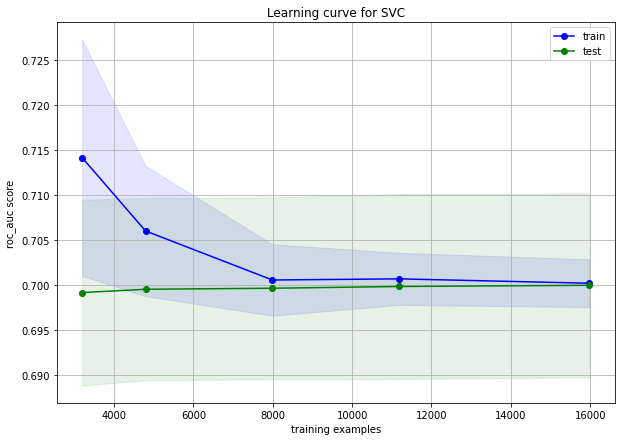

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(svc_train_sizes, svc_train_scores_mean, 'bo-', label="train")
plt.plot(svc_train_sizes, svc_test_scores_mean, 'go-', label="test")

plt.fill_between(svc_train_sizes, 
                 svc_train_scores_mean - svc_train_scores_std,
                 svc_train_scores_mean + svc_train_scores_std, 
                 alpha=0.1, color="blue")
plt.fill_between(svc_train_sizes, 
                 svc_test_scores_mean - svc_test_scores_std,
                 svc_test_scores_mean + svc_test_scores_std, 
                 alpha=0.1, color="green")

plt.grid()
plt.xlabel('training examples'), 
plt.ylabel('roc_auc score')
plt.title('Learning curve for SVC')
plt.legend()
plt.show()

##### 7 MLPC
**7.3 Multi-layer Perceptron classifier**

In [ ]:
best_mlpc_model = MLPClassifier(activation='logistic',
                                alpha=0.1,
                                hidden_layer_sizes=(100,),
                                solver='adam',
                                learning_rate='constant',
                                learning_rate_init=0.001,
                                tol=0.0001,
                                max_iter=1000)



mlpc_train_sizes, mlpc_train_scores, mlpc_test_scores = learning_curve(estimator = best_mlpc_model, 
                                                                       X=X_train_scaled, y=y_train,
                                                                       scoring='roc_auc',
                                                                       train_sizes=[0.2, 0.3, 0.5, 0.7, 1.],
                                                                       verbose=3)

mlpc_train_scores_mean = np.mean(mlpc_train_scores, axis=1)
mlpc_train_scores_std = np.std(mlpc_train_scores, axis=1)
mlpc_test_scores_mean = np.mean(mlpc_test_scores, axis=1)
mlpc_test_scores_std = np.std(mlpc_test_scores, axis=1)

[learning_curve] Training set sizes: [ 3196  4794  7991 11188 15983]
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ , score=(train=0.698, test=0.715), total=   1.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................ , score=(train=0.703, test=0.717), total=   2.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV] ................ , score=(train=0.703, test=0.720), total=   3.2s
[CV]  ................................................................
[CV] ................ , score=(train=0.705, test=0.720), total=   3.7s
[CV]  ................................................................
[CV] ................ , score=(train=0.707, test=0.720), total=   5.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.731, test=0.690), total=   1.2s
[CV]  ................................................................
[CV] ................ , score=(train=0.724, test=0.694), total=   2.6s
[CV]  ................................................................
[CV] ................ , score=(train=0.715, test=0.693), total=   3.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.714, test=0.694), total=   4.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.3min finished


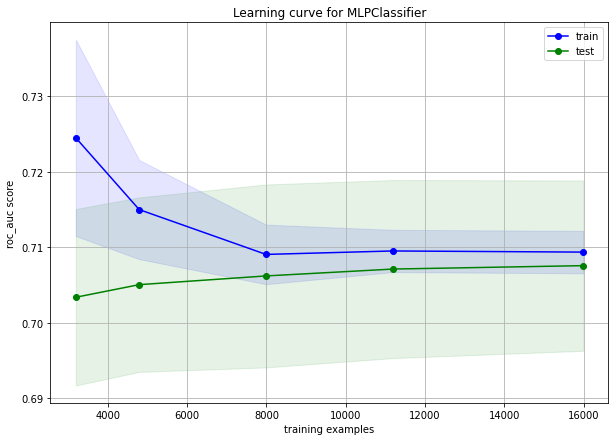

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(mlpc_train_sizes, mlpc_train_scores_mean, 'bo-', label="train")
plt.plot(mlpc_train_sizes, mlpc_test_scores_mean, 'go-', label="test")

plt.fill_between(mlpc_train_sizes, 
                 mlpc_train_scores_mean - mlpc_train_scores_std,
                 mlpc_train_scores_mean + mlpc_train_scores_std, 
                 alpha=0.1, color="blue")
plt.fill_between(mlpc_train_sizes, 
                 mlpc_test_scores_mean - mlpc_test_scores_std,
                 mlpc_test_scores_mean + mlpc_test_scores_std, 
                 alpha=0.1, color="green")

plt.grid()
plt.xlabel('training examples'), 
plt.ylabel('roc_auc score')
plt.title('Learning curve for MLPClassifier')
plt.legend()
plt.show()

##### 7 Сравнение и ответ

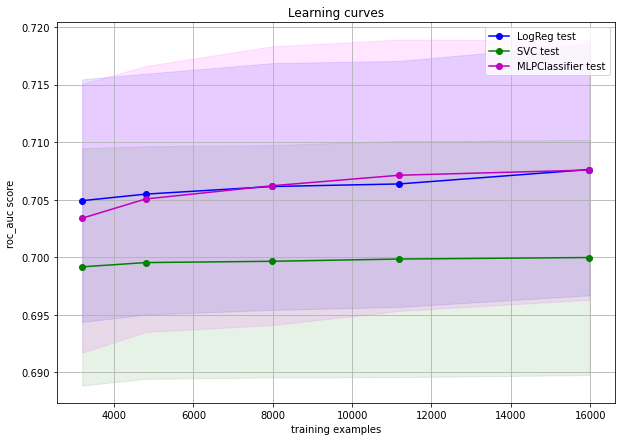

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(lr_train_sizes, lr_test_scores_mean, 'bo-', label="LogReg test")
plt.plot(svc_train_sizes, svc_test_scores_mean, 'go-', label="SVC test")
plt.plot(mlpc_train_sizes, mlpc_test_scores_mean, 'mo-', label="MLPClassifier test")

plt.fill_between(lr_train_sizes, 
                 lr_test_scores_mean - lr_test_scores_std,
                 lr_test_scores_mean + lr_test_scores_std, 
                 alpha=0.1, color="blue")
plt.fill_between(svc_train_sizes, 
                 svc_test_scores_mean - svc_test_scores_std,
                 svc_test_scores_mean + svc_test_scores_std, 
                 alpha=0.1, color="green")
plt.fill_between(mlpc_train_sizes, 
                 mlpc_test_scores_mean - mlpc_test_scores_std,
                 mlpc_test_scores_mean + mlpc_test_scores_std, 
                 alpha=0.1, color="magenta")

plt.grid()
plt.xlabel('training examples'), 
plt.ylabel('roc_auc score')
plt.title('Learning curves')
plt.legend()
plt.show()

* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?

Если увеличение числа объектов будет делать классы несбалансированными (будем добавлять объкты в осноном одного класса), то качество на будет снижаться. 

* Для каких целей можно использовать знание качества на обучающей части выборки?

Качество на обучающей выборке полезно знать для сравнения с качеством на тестовой и определения переобучения. Если мы видим, например, оценки двух моделей на тестовой выбрке 0.72 и 0.75, мы посчитаем, что вторая модель (с 0.75) лучше. Но если мы увидим для этих моделей соответвующие оценки на обучающей выборке, это может поменять ситуацию. Например, 0.74 для первой и 0.99 для второй. Тогда видно, что вторая, на самом деле, переобучена, и первая лучше. 

* Какой из алгоритмов лучше обучается на меньшем числе объектов?

На меньшем числе объектов лучше обучается логистическая регрессия.

* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

Визуально по графикам кажется так, что все три модели вышли на плато, но график для логистической регрессии немного поднимается, и, вероятно, на ней качество еще могло бы немного улучшиться на большем числе объектов.

#### 8

После выполнения данного блока вы получите решение, которое можно отправить в соревнование на [kaggle](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). 

Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 8** (1 балл) 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

***Решение задания 8:***

Так как в 5 задании я масштабировала уже разбитые на две подвыборки данные, то здесь я не придумала, как подклеить к ним новые категориальные признаки, не напутав с индексами :( 

Поэтому теперь я проделаю всё со стандартизацией заново со всем датасетом: стандартизирую всё в (преобразованном) `train_df` и подклею новые признаки. 

In [23]:
heroes_df = pd.read_csv(path_to_data + 'heroes.csv')
heroes_df.head()

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,91,42,87,15,65,11,6,34,69,74
1,1,69,85,71,24,64,74,68,39,65,11
2,2,17,40,31,67,99,32,7,72,48,104
3,3,80,43,101,71,94,69,70,98,24,39
4,4,25,15,75,29,95,3,32,55,64,86


In [24]:
encoder = OneHotEncoder(sparse=False)

In [25]:
# вектора для первой команды
rcodes = pd.DataFrame(encoder.fit_transform(heroes_df.iloc[:, 1:6]))
# вектора для второй команды
dcodes = pd.DataFrame(encoder.fit_transform(heroes_df.iloc[:, 6:11]))

# подклеиваю к исходным данным
heroes_df = heroes_df.join(rcodes)
heroes_df = heroes_df.join(dcodes, lsuffix='_d')

# убираю исходные столбцы игроков
heroes_df = heroes_df.drop(columns=['player_0', 'player_1', 'player_2', 'player_3', 'player_4', 'player_5', 'player_6','player_7', 'player_8', 'player_9'])

heroes_df.head()

,mid,0_d,1_d,2_d,3_d,4_d,5_d,6_d,7_d,8_d,9_d,10_d,11_d,12_d,13_d,14_d,15_d,16_d,17_d,18_d,19_d,20_d,21_d,22_d,23_d,24_d,25_d,26_d,27_d,28_d,29_d,30_d,31_d,32_d,33_d,34_d,35_d,36_d,37_d,38_d,...,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
rcodes.shape, dcodes.shape

((49948, 555), (49948, 555))

Кодов как-то много

In [27]:
max(rcodes.sum(axis=1)), max(rcodes.sum(axis=1)), min(dcodes.sum(axis=1)), max(dcodes.sum(axis=1)), 

(5.0, 5.0, 5.0, 5.0)

Но в каждом векторе для каждой команды ровно по 5 единиц.

#### 9

После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**Задание 9** (1 балл)

Добавьте к масштабированным вещественным признакам закодированные категориальные и подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. 

Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

***Решение задания 9:***

##### Добавление признаков

Как я написала в 8 задании, чтобы аккуратно подклеить новые признаки, мне придется отмасштабировать всё заново. 

Добавляю новые признаки:

In [28]:
scaler = StandardScaler()
train_df.iloc[:, 2:] = scaler.fit_transform(train_df.drop(columns=['mid', 'radiant_won']))

In [29]:
new_train_df = train_df.join(heroes_df.set_index('mid'), on='mid')
new_train_df.head()

,mid,radiant_won,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,player_1,player_2,player_3,player_4,player_6,player_7,player_8,player_9,rad_gold_sum,dire_gold_sum,rad_lh_sum,dire_lh_sum,rad_gold_std,dire_gold_std,rad_lh_std,dire_lh_std,0_d,1_d,2_d,3_d,4_d,5_d,6_d,7_d,8_d,9_d,10_d,11_d,12_d,13_d,...,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554
0,0,1,0.885962,-1.024972,0.310126,1.308403,0.008332,1.423661,-1.702024,1.835383,0.837252,-1.238365,1.573395,0.759007,0.433798,2.512898,-1.299838,1.037951,0.449453,1.934968,0.522062,0.805408,0.808355,1.121018,-0.110565,1.178669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1.294899,-0.147528,0.256604,1.311335,0.813586,-0.934141,0.333935,0.504626,1.876913,-0.669538,0.068543,1.071981,-0.192552,-1.250049,0.169693,0.669657,0.761431,0.321175,0.794057,1.748483,0.667124,-0.318718,0.132491,1.015126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,-1.518941,3.327967,0.283731,-0.807327,-1.269227,0.838117,-1.098361,-1.106490,-1.086123,2.174597,0.795023,-0.179916,-0.766706,1.519898,-0.722522,-0.750905,1.350722,-1.191756,0.498343,-1.724013,0.613953,0.172925,2.642602,-0.282520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,0.071779,0.828382,-0.713382,-1.388677,-0.370567,-0.454991,0.347433,-1.311280,0.733285,0.933520,-0.190914,-1.171001,-0.923294,-0.204786,0.537076,-1.066586,0.276132,-1.124515,-0.784740,-0.976043,-0.529143,-1.078702,-0.372298,-1.011658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,-1.176438,-1.074570,0.191352,-1.045585,1.056895,0.707169,-0.030513,-0.727893,-1.138106,-0.566114,0.172326,-1.223163,-0.140356,1.363109,-0.775005,-0.645679,-1.353084,0.354796,-1.557880,0.784545,-0.468686,-0.236501,-0.775038,-0.755894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Появились ли там пропуски?

In [30]:
max(new_train_df.isna().sum())

0

Ура, пропуски не появились!

In [31]:
nX_train, nX_test, ny_train, ny_test = train_test_split(new_train_df.drop(columns=['mid', 'radiant_won']), new_train_df['radiant_won'], test_size=0.2, random_state=1234)

In [32]:
data_part=4000

##### 9 LogReg 

**9.1. Logistic Regression Classifier**

Оставлю только перебор параметров с `saga` solver-ом.

In [ ]:
logreg_model = LogisticRegression(tol=0.0001, 
                                  solver='saga', 
                                  random_state=1234,
                                  max_iter=100)

f9_logreg_params_set = {
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3],
'penalty':['l1', 'l2', 'elasticnet'],
'fit_intercept':[True, False],
'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9]
}

f9_logreg_CV = GridSearchCV(estimator=logreg_model,
                         param_grid=f9_logreg_params_set,
                         scoring='roc_auc',
                         return_train_score=True,
                         verbose=3)

f9_logreg_CV.fit(nX_train[:data_part], ny_train[:data_part])

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.699, test=0.735), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.703, test=0.719), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.716, test=0.667), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.699, test=0.735), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.703, test=0.719), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.716, test=0.667), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.699, test=0.735), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.703, test=0.719), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.716, test=0.667), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.699, test=0.735), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.703, test=0.719), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.716, test=0.667), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.699, test=0.735), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.703, test=0.719), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.716, test=0.667), total=   0.7s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.0001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.699, test=0.735), total=   0.5s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.703, test=0.719), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.716, test=0.667), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.3s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.1, penalty=elas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.699, test=0.735), total=   0.5s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.703, test=0.719), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.716, test=0.667), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.3, penalty=elas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.699, test=0.735), total=   0.5s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.703, test=0.719), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.716, test=0.667), total=   0.7s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.5, penalty=elas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.699, test=0.735), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.703, test=0.719), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.716, test=0.667), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.7, penalty=elas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l1 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.699, test=0.735), total=   0.5s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.711, test=0.689), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.703, test=0.719), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.709, test=0.695), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.716, test=0.667), total=   0.6s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.1s
[CV] C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .
[CV]  C=0.0001, fit_intercept=False, l1_ratio=0.9, penalty=elas

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.3s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.726, test=0.672), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.709, test=0.745), total=   0.8s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.720, test=0.695), total=   0.8s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.712, test=0.733), total=   0.8s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.718, test=0.707), total=   0.8s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.726, test=0.672), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.704, test=0.741), total=   0.8s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.720, test=0.692), total=   0.8s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.706, test=0.731), total=   0.9s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.717, test=0.703), total=   0.8s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.726, test=0.672), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.5s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.726, test=0.672), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.726, test=0.672), total=   0.7s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.001, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.726, test=0.673), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.709, test=0.745), total=   0.8s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.720, test=0.695), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.712, test=0.733), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.719, test=0.707), total=   0.9s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.3s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.726, test=0.673), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.704, test=0.741), total=   0.9s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.720, test=0.692), total=   0.8s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.706, test=0.731), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.717, test=0.703), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.726, test=0.673), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.3s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.726, test=0.673), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.4s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.3s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.500, test=0.500), total=   0.3s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.710, test=0.741), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.721, test=0.695), total=   0.6s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.714, test=0.723), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.720, test=0.702), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.726, test=0.673), total=   0.7s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.3s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.3s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.500, test=0.500), total=   0.2s
[CV] C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..
[CV]  C=0.001, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.707, test=0.745), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.720, test=0.692), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.710, test=0.735), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.717, test=0.702), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.722, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.750, test=0.752), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.759, test=0.705), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.753, test=0.734), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.762, test=0.685), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.714, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.725, test=0.699), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.717, test=0.731), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.723, test=0.708), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.707, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.720, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.710, test=0.735), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.717, test=0.702), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.722, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.750, test=0.752), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.759, test=0.705), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.753, test=0.734), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.762, test=0.685), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.712, test=0.747), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.724, test=0.698), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.715, test=0.734), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.722, test=0.709), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.707, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.720, test=0.692), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.710, test=0.735), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.717, test=0.702), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.722, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.750, test=0.752), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.759, test=0.705), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.753, test=0.734), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.762, test=0.685), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.711, test=0.747), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.723, test=0.696), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.714, test=0.736), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.721, test=0.707), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.707, test=0.745), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.720, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.710, test=0.735), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.717, test=0.702), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.722, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.750, test=0.752), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.759, test=0.705), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.753, test=0.734), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.762, test=0.685), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.710, test=0.746), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.722, test=0.695), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.712, test=0.735), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.720, test=0.705), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.707, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.720, test=0.692), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.710, test=0.735), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.717, test=0.702), total=   0.9s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.722, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.750, test=0.752), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.759, test=0.705), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.753, test=0.734), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.762, test=0.685), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.708, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.720, test=0.693), total=   0.7s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.710, test=0.735), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.717, test=0.702), total=   0.8s
[CV] C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.01, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.707, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.720, test=0.692), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.709, test=0.735), total=   0.9s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.717, test=0.702), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.721, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.751, test=0.752), total=   0.6s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.759, test=0.706), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.754, test=0.734), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.762, test=0.686), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.714, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.725, test=0.699), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.717, test=0.731), total=   0.9s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.723, test=0.708), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.707, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.720, test=0.692), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.709, test=0.735), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.717, test=0.702), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.721, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.751, test=0.752), total=   0.6s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.759, test=0.706), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.754, test=0.734), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.762, test=0.686), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.712, test=0.747), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.724, test=0.698), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.715, test=0.734), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.722, test=0.709), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.707, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.720, test=0.692), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.709, test=0.735), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.717, test=0.702), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.721, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.751, test=0.752), total=   0.6s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.759, test=0.706), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.754, test=0.734), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.762, test=0.686), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.711, test=0.747), total=   0.9s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.723, test=0.696), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.714, test=0.736), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.721, test=0.707), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.707, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.720, test=0.692), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.709, test=0.735), total=   0.9s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.717, test=0.702), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.721, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.751, test=0.752), total=   0.6s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.759, test=0.706), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.754, test=0.734), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.762, test=0.686), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.710, test=0.747), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.722, test=0.695), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.712, test=0.735), total=   0.9s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.719, test=0.705), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.707, test=0.745), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.720, test=0.692), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.709, test=0.735), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.717, test=0.702), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.721, test=0.692), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.751, test=0.752), total=   0.6s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.759, test=0.706), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.754, test=0.734), total=   0.8s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.756, test=0.718), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.762, test=0.686), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.708, test=0.746), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.720, test=0.693), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.710, test=0.735), total=   0.9s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.717, test=0.702), total=   0.7s
[CV] C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ...
[CV]  C=0.01, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.719, test=0.746), total=   2.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.729, test=0.700), total=   3.3s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.722, test=0.734), total=   2.9s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.726, test=0.710), total=   2.5s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.733, test=0.686), total=   3.1s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.842, test=0.750), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.850, test=0.692), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.848, test=0.727), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.843, test=0.729), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.848, test=0.689), total=   2.1s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.819, test=0.754), total=   5.2s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.828, test=0.697), total=   5.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.825, test=0.730), total=   5.3s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.821, test=0.731), total=   5.3s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.8

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.719, test=0.746), total=   2.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.729, test=0.700), total=   3.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.722, test=0.734), total=   2.9s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.726, test=0.710), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.733, test=0.686), total=   3.2s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.842, test=0.750), total=   2.7s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.850, test=0.692), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.848, test=0.727), total=   2.7s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.843, test=0.729), total=   2.7s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.848, test=0.689), total=   2.0s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.774, test=0.753), total=   4.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.783, test=0.703), total=   4.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.780, test=0.732), total=   4.5s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.778, test=0.726), total=   4.2s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.7

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.719, test=0.746), total=   2.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.729, test=0.700), total=   3.3s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.722, test=0.734), total=   2.9s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.726, test=0.710), total=   2.5s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.733, test=0.686), total=   3.2s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.842, test=0.750), total=   2.7s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.850, test=0.692), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.848, test=0.727), total=   2.5s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.843, test=0.729), total=   2.8s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.848, test=0.689), total=   2.1s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.745, test=0.747), total=   3.9s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.755, test=0.701), total=   3.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.753, test=0.733), total=   3.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.751, test=0.717), total=   3.7s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.7

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.719, test=0.746), total=   2.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.729, test=0.700), total=   3.3s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.722, test=0.734), total=   2.9s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.726, test=0.710), total=   2.5s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.733, test=0.686), total=   3.2s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.842, test=0.750), total=   2.7s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.850, test=0.692), total=   2.7s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.848, test=0.727), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.843, test=0.729), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.848, test=0.689), total=   2.1s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.729, test=0.743), total=   2.8s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.740, test=0.700), total=   3.8s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.736, test=0.732), total=   3.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.736, test=0.712), total=   3.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.7

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.719, test=0.746), total=   2.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.729, test=0.700), total=   3.3s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.722, test=0.734), total=   2.9s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.726, test=0.710), total=   2.5s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.733, test=0.686), total=   3.2s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.842, test=0.750), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.850, test=0.692), total=   2.8s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.848, test=0.727), total=   2.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.843, test=0.729), total=   2.7s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.848, test=0.689), total=   2.0s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.721, test=0.744), total=   2.4s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.732, test=0.700), total=   3.6s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.725, test=0.734), total=   3.5s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.729, test=0.711), total=   2.8s
[CV] C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .....
[CV]  C=0.1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.7

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.719, test=0.746), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.728, test=0.700), total=   2.5s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.721, test=0.735), total=   3.0s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.727, test=0.710), total=   2.1s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.734, test=0.687), total=   2.8s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.842, test=0.750), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.850, test=0.692), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.848, test=0.727), total=   2.5s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.843, test=0.729), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.848, test=0.689), total=   2.1s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.819, test=0.754), total=   5.0s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.828, test=0.697), total=   5.2s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.825, test=0.731), total=   5.2s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.821, test=0.731), total=   5.2s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.719, test=0.746), total=   2.7s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.728, test=0.700), total=   2.4s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.721, test=0.735), total=   3.1s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.727, test=0.710), total=   2.1s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.734, test=0.687), total=   2.9s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.842, test=0.750), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.850, test=0.692), total=   2.7s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.848, test=0.727), total=   2.5s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.843, test=0.729), total=   2.8s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.848, test=0.689), total=   1.9s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.774, test=0.752), total=   4.4s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.783, test=0.703), total=   4.3s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.780, test=0.733), total=   4.5s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.779, test=0.725), total=   4.1s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.719, test=0.746), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.728, test=0.700), total=   2.4s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.721, test=0.735), total=   3.0s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.727, test=0.710), total=   2.2s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.734, test=0.687), total=   2.7s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.842, test=0.750), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.850, test=0.692), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.848, test=0.727), total=   2.7s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.843, test=0.729), total=   2.7s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.848, test=0.689), total=   2.0s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.745, test=0.745), total=   3.7s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.756, test=0.701), total=   3.9s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.753, test=0.732), total=   3.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.751, test=0.716), total=   3.8s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.719, test=0.746), total=   2.7s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.728, test=0.700), total=   2.4s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.721, test=0.735), total=   3.0s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.727, test=0.710), total=   2.1s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.734, test=0.687), total=   2.8s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.842, test=0.750), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.850, test=0.692), total=   2.7s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.848, test=0.727), total=   2.5s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.843, test=0.729), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.848, test=0.689), total=   2.0s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.729, test=0.741), total=   3.3s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.741, test=0.701), total=   3.4s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.736, test=0.732), total=   3.5s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.736, test=0.712), total=   3.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.719, test=0.746), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.728, test=0.700), total=   2.4s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.721, test=0.735), total=   2.9s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.727, test=0.710), total=   2.2s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l1 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.734, test=0.687), total=   2.7s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.842, test=0.750), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.850, test=0.692), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.848, test=0.727), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.843, test=0.729), total=   2.6s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.848, test=0.689), total=   2.0s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.722, test=0.745), total=   3.5s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.731, test=0.700), total=   3.3s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.726, test=0.734), total=   3.1s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.729, test=0.711), total=   3.4s
[CV] C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ....
[CV]  C=0.1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.871, test=0.728), total=   8.3s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.884, test=0.666), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.882, test=0.693), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.874, test=0.718), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.882, test=0.672), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.905, test=0.654), total=   4.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.896, test=0.707), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.902, test=0.661), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.893, test=0.709), total=   6.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.904, test=0.655), total=   6.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.902, test=0.682), total=   6.2s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.895, test=0.707), total=   6.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.901, test=0.663), total=   6.0s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.871, test=0.728), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.884, test=0.666), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.882, test=0.693), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.874, test=0.718), total=   8.4s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.882, test=0.672), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.905, test=0.654), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.896, test=0.707), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.902, test=0.661), total=   4.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.890, test=0.714), total=   6.7s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.901, test=0.657), total=   6.7s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.899, test=0.685), total=   6.7s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.891, test=0.709), total=   6.8s
[CV] C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.898, test=0.665), total=   6.7s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.871, test=0.728), total=   8.3s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.884, test=0.666), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.882, test=0.693), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.874, test=0.718), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.882, test=0.672), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.905, test=0.654), total=   4.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.896, test=0.707), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.902, test=0.661), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.886, test=0.718), total=   7.2s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.897, test=0.660), total=   7.2s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.895, test=0.687), total=   7.5s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.887, test=0.711), total=   7.4s
[CV] C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.895, test=0.668), total=   7.3s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.871, test=0.728), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.884, test=0.666), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.882, test=0.693), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.874, test=0.718), total=   8.3s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.882, test=0.672), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.905, test=0.654), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.896, test=0.707), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.902, test=0.661), total=   4.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.881, test=0.723), total=   7.6s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.892, test=0.662), total=   7.7s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.890, test=0.689), total=   7.7s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.882, test=0.714), total=   7.7s
[CV] C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.890, test=0.670), total=   7.8s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.871, test=0.728), total=   8.3s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.884, test=0.666), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.882, test=0.693), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.874, test=0.718), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.882, test=0.672), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.905, test=0.654), total=   4.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.896, test=0.707), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.902, test=0.661), total=   3.9s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.875, test=0.727), total=   8.0s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.887, test=0.665), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.885, test=0.692), total=   8.3s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.877, test=0.716), total=   8.1s
[CV] C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet .......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.885, test=0.672), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.872, test=0.729), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.884, test=0.666), total=   8.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.882, test=0.692), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.874, test=0.718), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.882, test=0.672), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.905, test=0.654), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.896, test=0.707), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.902, test=0.661), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.893, test=0.709), total=   6.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.904, test=0.655), total=   6.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.902, test=0.682), total=   6.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.895, test=0.707), total=   6.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.901, test=0.662), total=   6.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.872, test=0.729), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.884, test=0.666), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.882, test=0.692), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.874, test=0.718), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.882, test=0.672), total=   8.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.905, test=0.654), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.896, test=0.707), total=   3.8s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.902, test=0.661), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.890, test=0.714), total=   6.7s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.901, test=0.657), total=   6.7s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.899, test=0.685), total=   6.7s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.891, test=0.709), total=   6.8s
[CV] C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.898, test=0.665), total=   6.7s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.872, test=0.729), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.884, test=0.666), total=   8.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.882, test=0.692), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.874, test=0.718), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.882, test=0.672), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.905, test=0.654), total=   3.8s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.896, test=0.707), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.902, test=0.661), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.886, test=0.718), total=   7.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.897, test=0.659), total=   7.2s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.895, test=0.688), total=   7.2s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.887, test=0.711), total=   7.3s
[CV] C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.895, test=0.668), total=   7.3s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.872, test=0.729), total=   8.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.884, test=0.666), total=   8.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.882, test=0.692), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.874, test=0.718), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.882, test=0.672), total=   8.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.905, test=0.654), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.896, test=0.707), total=   3.8s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.902, test=0.661), total=   3.8s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.881, test=0.723), total=   7.6s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.892, test=0.662), total=   7.7s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.890, test=0.690), total=   7.7s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.882, test=0.714), total=   7.7s
[CV] C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.890, test=0.670), total=   7.8s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.872, test=0.729), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.884, test=0.666), total=   8.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.882, test=0.692), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.874, test=0.718), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.882, test=0.672), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.894, test=0.706), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.905, test=0.654), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.903, test=0.680), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.896, test=0.707), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.902, test=0.661), total=   3.9s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.875, test=0.727), total=   8.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.887, test=0.665), total=   8.0s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.885, test=0.692), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.877, test=0.716), total=   8.1s
[CV] C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.885, test=0.672), total=   8.2s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.901, test=0.693), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.912, test=0.644), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.909, test=0.668), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.903, test=0.699), total=   6.5s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.901, test=0.691), total=   4.1s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.912, test=0.643), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.910, test=0.666), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.904, test=0.698), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.912, test=0.648), total=   4.0s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.901, test=0.691), total=   5.7s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.912, test=0.643), total=   5.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.910, test=0.666), total=   5.7s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.903, test=0.698), total=   5.7s
[CV] C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.912, test=0.648), total=   5.7s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.901, test=0.693), total=   6.5s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.912, test=0.644), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.909, test=0.668), total=   6.5s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.903, test=0.699), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.901, test=0.691), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.912, test=0.643), total=   4.0s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.910, test=0.666), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.904, test=0.698), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.912, test=0.648), total=   4.0s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.901, test=0.691), total=   5.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.912, test=0.643), total=   5.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.910, test=0.667), total=   5.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.903, test=0.698), total=   5.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.911, test=0.648), total=   5.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.901, test=0.693), total=   6.5s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.912, test=0.644), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.909, test=0.668), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.903, test=0.699), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.901, test=0.691), total=   3.8s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.912, test=0.643), total=   4.0s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.910, test=0.666), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.904, test=0.698), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.912, test=0.648), total=   3.8s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.901, test=0.692), total=   6.0s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.912, test=0.643), total=   6.0s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.910, test=0.667), total=   6.2s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.903, test=0.698), total=   6.0s
[CV] C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.911, test=0.649), total=   6.1s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.901, test=0.693), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.912, test=0.644), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.909, test=0.668), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.903, test=0.699), total=   6.5s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.901, test=0.691), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.912, test=0.643), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.910, test=0.666), total=   3.8s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.904, test=0.698), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.912, test=0.648), total=   4.0s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.901, test=0.693), total=   6.2s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.912, test=0.643), total=   6.1s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.910, test=0.667), total=   6.2s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.903, test=0.698), total=   6.2s
[CV] C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.911, test=0.649), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.901, test=0.693), total=   6.6s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.912, test=0.644), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.909, test=0.668), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.903, test=0.699), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.901, test=0.691), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.912, test=0.643), total=   4.0s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.910, test=0.666), total=   3.8s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.904, test=0.698), total=   3.9s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.912, test=0.648), total=   3.8s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.901, test=0.693), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.912, test=0.643), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.910, test=0.668), total=   6.5s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.903, test=0.699), total=   6.3s
[CV] C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ......


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.901, test=0.693), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.912, test=0.643), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.909, test=0.668), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.903, test=0.699), total=   6.5s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.901, test=0.691), total=   3.8s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.913, test=0.643), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.910, test=0.666), total=   4.0s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.904, test=0.698), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.912, test=0.648), total=   3.8s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.901, test=0.691), total=   5.7s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.912, test=0.643), total=   5.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.910, test=0.666), total=   5.7s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.904, test=0.698), total=   5.7s
[CV] C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.912, test=0.648), total=   5.7s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.901, test=0.693), total=   6.5s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.912, test=0.643), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.909, test=0.668), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.903, test=0.699), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.911, test=0.649), total=   6.6s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.901, test=0.691), total=   3.8s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.913, test=0.643), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.910, test=0.666), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.904, test=0.698), total=   4.0s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.912, test=0.648), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.901, test=0.692), total=   5.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.912, test=0.643), total=   5.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.910, test=0.667), total=   6.1s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.903, test=0.698), total=   5.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.911, test=0.648), total=   5.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.901, test=0.693), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.912, test=0.643), total=   6.5s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.909, test=0.668), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.903, test=0.699), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.901, test=0.691), total=   4.0s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.913, test=0.643), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.910, test=0.666), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.904, test=0.698), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.912, test=0.648), total=   4.0s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.901, test=0.692), total=   6.0s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.912, test=0.643), total=   6.0s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.910, test=0.667), total=   6.1s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.903, test=0.698), total=   6.2s
[CV] C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.911, test=0.649), total=   6.1s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.901, test=0.693), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.912, test=0.643), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.909, test=0.668), total=   6.5s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.903, test=0.699), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.901, test=0.691), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.913, test=0.643), total=   4.1s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.910, test=0.666), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.904, test=0.698), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.912, test=0.648), total=   3.8s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.901, test=0.693), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.912, test=0.643), total=   6.1s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.910, test=0.667), total=   6.2s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.903, test=0.698), total=   6.2s
[CV] C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.901, test=0.693), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.912, test=0.643), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.909, test=0.668), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.903, test=0.699), total=   6.5s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.911, test=0.649), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.901, test=0.691), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.913, test=0.643), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.910, test=0.666), total=   4.1s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.904, test=0.698), total=   3.8s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2 .............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.912, test=0.648), total=   3.9s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.901, test=0.693), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.912, test=0.643), total=   6.4s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.910, test=0.668), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.903, test=0.699), total=   6.3s
[CV] C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .....


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=10, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.911, test=0.649), total=   6.3s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.902, test=0.689), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.904, test=0.697), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.902, test=0.689), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.913, test=0.641), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.911, test=0.665), total=   3.8s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.904, test=0.697), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.912, test=0.647), total=   3.8s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.8s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.904, test=0.697), total=   5.6s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.6s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.911, test=0.665), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.904, test=0.697), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.904, test=0.697), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.912, test=0.647), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.904, test=0.697), total=   5.6s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.902, test=0.689), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.904, test=0.697), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.902, test=0.689), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.913, test=0.641), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.904, test=0.697), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.8s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.8s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.904, test=0.697), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.911, test=0.665), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.904, test=0.697), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.904, test=0.697), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.912, test=0.647), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.904, test=0.697), total=   5.6s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.902, test=0.689), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.904, test=0.697), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.902, test=0.689), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.913, test=0.641), total=   4.0s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.911, test=0.665), total=   3.8s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.904, test=0.697), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.9s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.904, test=0.697), total=   5.7s
[CV] C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.911, test=0.665), total=   5.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.904, test=0.697), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.913, test=0.641), total=   4.0s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.911, test=0.665), total=   3.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.904, test=0.697), total=   5.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.911, test=0.665), total=   4.0s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.904, test=0.696), total=   3.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.902, test=0.689), total=   5.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.904, test=0.697), total=   5.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.912, test=0.647), total=   5.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.913, test=0.641), total=   3.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.904, test=0.696), total=   4.0s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.912, test=0.647), total=   3.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.913, test=0.641), total=   5.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.904, test=0.697), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.902, test=0.689), total=   4.0s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.912, test=0.647), total=   4.1s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.904, test=0.697), total=   5.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.911, test=0.665), total=   5.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.904, test=0.697), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.913, test=0.641), total=   4.0s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.9s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.904, test=0.697), total=   5.7s
[CV] C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=100.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.912, test=0.647), total=   6.0s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l1, score=(train=0.912, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.902, test=0.689), total=   4.0s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.8s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.1, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.911, test=0.665), total=   5.8s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l1, score=(train=0.912, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.911, test=0.665), total=   3.8s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.904, test=0.696), total=   4.1s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.3, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l1, score=(train=0.912, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.902, test=0.689), total=   4.0s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.8s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.5, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.911, test=0.665), total=   5.8s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l1, score=(train=0.912, test=0.647), total=   5.7s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.904, test=0.696), total=   4.1s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.7, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l1, score=(train=0.912, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.902, test=0.689), total=   4.1s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2 ..........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=l2, score=(train=0.912, test=0.647), total=   3.9s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.7s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet ..


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=True, l1_ratio=0.9, penalty=elasticnet, score=(train=0.912, test=0.647), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.904, test=0.696), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l1, score=(train=0.913, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.911, test=0.665), total=   4.0s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=l2, score=(train=0.913, test=0.647), total=   3.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.7s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.1, penalty=elasticnet, score=(train=0.913, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.902, test=0.689), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l1, score=(train=0.913, test=0.647), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.904, test=0.696), total=   4.1s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=l2, score=(train=0.913, test=0.647), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.3, penalty=elasticnet, score=(train=0.913, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.913, test=0.641), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l1, score=(train=0.913, test=0.647), total=   5.7s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.902, test=0.689), total=   4.0s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=l2, score=(train=0.913, test=0.647), total=   4.1s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.5, penalty=elasticnet, score=(train=0.913, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.911, test=0.665), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l1, score=(train=0.913, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.913, test=0.641), total=   4.1s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.911, test=0.665), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=l2, score=(train=0.913, test=0.647), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.7, penalty=elasticnet, score=(train=0.913, test=0.647), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.902, test=0.689), total=   5.7s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.913, test=0.641), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.904, test=0.696), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l1, score=(train=0.913, test=0.647), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.902, test=0.689), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.913, test=0.641), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.911, test=0.665), total=   4.0s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.904, test=0.696), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2 .........


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=l2, score=(train=0.913, test=0.647), total=   3.9s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.902, test=0.689), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.913, test=0.641), total=   5.8s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.911, test=0.665), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.904, test=0.696), total=   5.6s
[CV] C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet .


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 66.9min finished


[CV]  C=1000.0, fit_intercept=False, l1_ratio=0.9, penalty=elasticnet, score=(train=0.913, test=0.647), total=   5.6s


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1234, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0, 1000.0],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
         

Лучший параметр и значение критерия качества на нём:

In [ ]:
f9_logreg_CV.best_params_ , f9_logreg_CV.best_score_

({'C': 0.1, 'fit_intercept': False, 'l1_ratio': 0.1, 'penalty': 'elasticnet'},
 0.7209922923280174)

По сравнению с наилучшей для логистической регрессии качество изменилось на: 

In [ ]:
f9_logreg_CV.best_score_ - best_logreg_score

0.005668989612487518

Ура, качество немного повысилось! 

Заметно (по отладочному выводу), что во многих случаях модель сильно переобучалась: качество на тестовой порядка 0.65 при значении на обучающей около 0.91. А так же появилось особенно много ворнингов о том, что алгоритм не сходится, чего не было в задании 6, после масштабирования данных. 

##### 9 SVC

**9.2. C-Support Vector Classification**

In [30]:
# Инициализирую модель
svc_model = SVC(C=1.0, 
                kernel='rbf',
                gamma='scale',
                tol=0.001,
                random_state=1234)

# Тестируемые значения гиперпараметрa 
f9_svc_params_set = {
'kernel':['linear', 'poly', 'sigmoid', 'rbf'],
'C': [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2]
}

# Кросс-валидация
f9_svc_CV = GridSearchCV(estimator=svc_model,
                         param_grid=f9_svc_params_set,
                         scoring='roc_auc',
                         return_train_score=True,
                         verbose=3)

f9_svc_CV.fit(nX_train[:data_part], ny_train[:data_part])

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.0001, kernel=linear, score=(train=0.699, test=0.736), total=  23.9s
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.2s remaining:    0.0s


[CV]  C=0.0001, kernel=linear, score=(train=0.711, test=0.686), total=  23.8s
[CV] C=0.0001, kernel=linear .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s


[CV]  C=0.0001, kernel=linear, score=(train=0.704, test=0.719), total=  24.0s
[CV] C=0.0001, kernel=linear .........................................
[CV]  C=0.0001, kernel=linear, score=(train=0.709, test=0.695), total=  23.9s
[CV] C=0.0001, kernel=linear .........................................
[CV]  C=0.0001, kernel=linear, score=(train=0.716, test=0.667), total=  23.7s
[CV] C=0.0001, kernel=poly ...........................................
[CV]  C=0.0001, kernel=poly, score=(train=0.744, test=0.737), total=  23.7s
[CV] C=0.0001, kernel=poly ...........................................
[CV]  C=0.0001, kernel=poly, score=(train=0.750, test=0.681), total=  23.6s
[CV] C=0.0001, kernel=poly ...........................................
[CV]  C=0.0001, kernel=poly, score=(train=0.748, test=0.710), total=  23.7s
[CV] C=0.0001, kernel=poly ...........................................
[CV]  C=0.0001, kernel=poly, score=(train=0.754, test=0.692), total=  23.5s
[CV] C=0.0001, kernel=poly .........

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed: 145.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1234, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100.0],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=3)

Лучший набор параметров и значение критерия качества на них:

In [32]:
f9_svc_CV.best_params_ , f9_svc_CV.best_score_

({'C': 0.01, 'kernel': 'linear'}, 0.7217649379191164)

С наилучшей по итогам 6 задания качество изменилось на:

In [33]:
f9_svc_CV.best_score_ - best_svc_score

0.015003997487233134

Оптимальные параметры не поменялись, но качество повысилось.

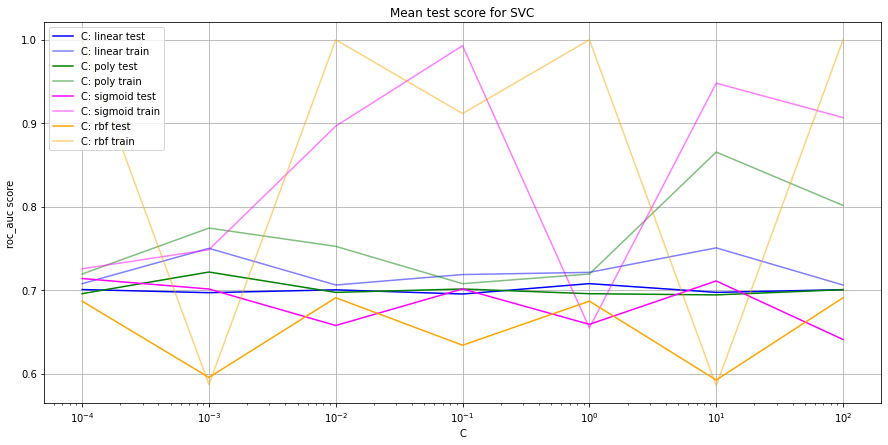

In [44]:
fig = plt.figure(figsize=(15,7))

f9_svc_test_scores = np.array(f9_svc_CV.cv_results_['mean_test_score']).reshape(len(f9_svc_params_set['kernel']), len(f9_svc_params_set['C']))
f9_svc_train_scores = np.array(f9_svc_CV.cv_results_['mean_train_score']).reshape(len(f9_svc_params_set['kernel']), len(f9_svc_params_set['C']))

colors = ['blue', 'green', 'magenta', 'orange']

for ind, k in enumerate(f9_svc_params_set['kernel']):
    plt.plot(f9_svc_params_set['C'], f9_svc_test_scores[ind], label='C: ' + k +' test', color=colors[ind])
    plt.plot(f9_svc_params_set['C'], f9_svc_train_scores[ind], label='C: ' + k +' train', color=colors[ind], alpha=0.5)

plt.legend()
plt.grid()
plt.xlabel('C')
plt.ylabel('roc_auc score')
plt.title('Mean test score for SVC')
plt.xscale('log')
plt.show()

При больших `C` - слабой регуляризации - наблюдается переобучение со всеми ядрами.  Меньше всего переобучается с линейным ядром. 

##### 9 MLPC

**9.3. Multi-layer Perceptron classifier**

Немного уменьшу сетку параметров.

In [33]:
# Инициализирую модель
mlpc_model = MLPClassifier(alpha=0.0001,
                           solver='adam',
                           learning_rate='constant', 
                           learning_rate_init=0.001,
                           tol=0.0001,
                           max_iter=1000,
                           random_state=1234)


# Тестируемые значения гиперпараметров
f9_mlpc_params_set = {
'activation':['logistic', 'tanh', 'relu'],
'alpha': [1e-4, 1e-3, 1e-2, 0.1, 1],
'hidden_layer_sizes':[(100,), (50,),
                      (50, 10)]
}

# Кросс-валидация
f9_mlpc_CV = GridSearchCV(estimator=mlpc_model,
                          param_grid=f9_mlpc_params_set,
                          scoring='roc_auc',
                          return_train_score=True,
                          verbose=3)

f9_mlpc_CV.fit(nX_train[:data_part], ny_train[:data_part])

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.662), total= 1.3min
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.614), total= 1.4min
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.7min remaining:    0.0s


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.623), total= 1.3min
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.665), total= 1.3min
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,) ....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), score=(train=1.000, test=0.640), total= 1.3min
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,) .....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=1.000, test=0.665), total=  54.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,) .....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), score=(train=1.000, test=0.613), total=  55.2s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,) .....
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), score

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 121.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1234, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_g

Лучший набор параметров и значение критерия качества на них:

In [34]:
f9_mlpc_CV.best_params_ , f9_mlpc_CV.best_score_

({'activation': 'logistic', 'alpha': 1, 'hidden_layer_sizes': (50,)},
 0.7232876883871493)

По сравнению наилучшей по итогам 6 задачи качество изменилось на: 

In [35]:
f9_mlpc_CV.best_score_ - best_mlpc_score

0.010527765776934594

Оптимальные параметры поменялись. Качество улучшилось! 

Переобучение наблюдалось в основном с `relu` и на маленьких `alpha` с `tanh`

#### Лучшие модели по итогам 9 задания

In [33]:
best9_logreg_model = LogisticRegression(tol=0.0001, 
                                        solver='saga',
                                        penalty='elasticnet',
                                        fit_intercept=False,
                                        C=0.1,
                                        l1_ratio=0.1,
                                        max_iter=500,
                                        random_state=1234)
best9_logreg_model.fit(nX_train[:4000], ny_train[:4000])

best9_mlpc_model = MLPClassifier(activation='logistic',
                                 alpha=1,
                                 hidden_layer_sizes=(50,),
                                 solver='adam',
                                 learning_rate='constant',
                                 learning_rate_init=0.001,
                                 tol=0.0001,
                                 max_iter=1000,
                                 random_state=1234)
best9_mlpc_model.fit(nX_train[:4000], ny_train[:4000])

best9_svc_model = SVC(C=0.01, 
                      kernel='linear',
                      gamma='scale',
                      tol=0.001,
                      random_state=1234)
best9_svc_model.fit(nX_train[:4000], ny_train[:4000])

# чтобы не перезапускать ячейки с кросс-валидацией, но иметь под рукой значения качества оттуда
best9_logreg_score = 0.7209922923280174
best9_svc_score = 0.7217649379191164
best9_mlpc_score = 0.7232876883871493

In [34]:
print('LogReg score:', best9_logreg_score)
print('SVC score:', best9_svc_score)
print('MLPClassifier score:', best9_mlpc_score)

LogReg score: 0.7209922923280174
SVC score: 0.7217649379191164
MLPClassifier score: 0.7232876883871493


По итогам 9 задания наилучшее качество у MLPClassifier. На втором месте SVC.

### Смешивание моделей (blending)

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

#### 10

**Задание 10** (2 балла)

При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

**Решение задания 10:**

Пример кода класса смотрела [здесь](https://scikit-learn.org/stable/developers/develop.html) (в "Rolling your own estimator").  

In [35]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted

class MyBlendedModel(BaseEstimator, ClassifierMixin):

  def __init__(self, estimator1, estimator2, alpha=0.5):
    self.estimator1 = estimator1
    self.estimator2 = estimator2
    self.alpha = alpha
  
  def fit(self, X, y):
    X, y = check_X_y(X, y)
    self.estimator1.fit(X, y)
    self.estimator2.fit(X, y)

    self.X_ = X
    self.y_ = y

    return self

  def predict_proba(self, X):
    check_is_fitted(self)

    est1_prob = self.estimator1.predict_proba(X)
    est2_prob = self.estimator2.predict_proba(X)

    return (self.alpha*est1_prob + (1 - self.alpha)*est2_prob)

  def predict(self, X):
    probas = self.predict_proba(X)

    return np.array([int(x[1] > x[0]) for x in probas])
    

Проверю на работоспособность на наиболее удачных моделях логистической регрессии и MLPClassifier (по итогам 6 задания, без новых признаков):

In [36]:
best_logreg_model = LogisticRegression(tol=0.0001, 
                                  solver='saga',
                                  penalty='elasticnet',
                                  fit_intercept=True,
                                  C=0.008,
                                  l1_ratio=0.45,
                                  max_iter=500)

best_mlpc_model = MLPClassifier(activation='logistic',
                                alpha=0.1,
                                hidden_layer_sizes=(100,),
                                solver='adam',
                                learning_rate='constant',
                                learning_rate_init=0.001,
                                tol=0.0001,
                                max_iter=1000)

blended = MyBlendedModel(estimator1=best_logreg_model,
                         estimator2=best_mlpc_model,
                         alpha=0.5)

blended.fit(X_train_scaled[:1000], y_train[:1000])
b_y_pred = blended.predict(X_test_scaled[:100])
b_proba_pred = blended.predict_proba(X_test_scaled[:100])

roc_auc_score(y_true=y_test[:100], y_score=b_y_pred)

0.7043269230769231

In [37]:
b_proba_pred[:2]

array([[0.41112373, 0.58887627],
       [0.6934433 , 0.3065567 ]])

In [38]:
b_y_pred[:2]

array([1, 0])

Работает!

#### 11

**Задание 11** (1 балл)

Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

***Решение задания 11:***

Использую показавшие наилучшие разультаты в 9 задании модели: SVC и MLPClassifier. Использую такое же количество объектов (4000), как и в предыдущих заданиях. 

In [39]:
# Инициализирую модель
best9_mlpc_model = MLPClassifier(activation='logistic',
                                 alpha=1.0,
                                 hidden_layer_sizes=(50,),
                                 solver='adam',
                                 learning_rate='constant',
                                 learning_rate_init=0.001,
                                 tol=0.0001,
                                 max_iter=1000)

best9_svc_model = SVC(C=0.01, 
                      kernel='linear',
                      gamma='scale',
                      tol=0.001,
                      probability=True,
                      random_state=1234)

blended_model = MyBlendedModel(estimator1=best9_svc_model,
                               estimator2=best9_mlpc_model,
                               alpha=0.5)

# Тестируемые значения гиперпараметрa 
blended_params_set = {
'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

# Кросс-валидация
blended_CV = GridSearchCV(estimator=blended_model,
                          param_grid=blended_params_set,
                          scoring='roc_auc',
                          return_train_score=True,
                          verbose=3)

blended_CV.fit(nX_train[:4000], ny_train[:4000])

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] alpha=0.0 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... alpha=0.0, score=(train=0.760, test=0.754), total= 1.6min
[CV] alpha=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] ....... alpha=0.0, score=(train=0.794, test=0.702), total= 1.7min
[CV] alpha=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.8min remaining:    0.0s


[CV] ....... alpha=0.0, score=(train=0.781, test=0.738), total= 1.8min
[CV] alpha=0.0 .......................................................
[CV] ....... alpha=0.0, score=(train=0.778, test=0.724), total= 1.7min
[CV] alpha=0.0 .......................................................
[CV] ....... alpha=0.0, score=(train=0.786, test=0.689), total= 1.7min
[CV] alpha=0.1 .......................................................
[CV] ....... alpha=0.1, score=(train=0.781, test=0.756), total= 1.7min
[CV] alpha=0.1 .......................................................
[CV] ....... alpha=0.1, score=(train=0.789, test=0.703), total= 1.7min
[CV] alpha=0.1 .......................................................
[CV] ....... alpha=0.1, score=(train=0.778, test=0.736), total= 1.7min
[CV] alpha=0.1 .......................................................
[CV] ....... alpha=0.1, score=(train=0.783, test=0.725), total= 1.7min
[CV] alpha=0.1 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed: 109.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MyBlendedModel(alpha=0.5,
                                      estimator1=SVC(C=0.01, break_ties=False,
                                                     cache_size=200,
                                                     class_weight=None,
                                                     coef0=0.0,
                                                     decision_function_shape='ovr',
                                                     degree=3, gamma='scale',
                                                     kernel='linear',
                                                     max_iter=-1,
                                                     probability=True,
                                                     random_state=1234,
                                                     shrinking=True, tol=0.001,
                                                     verbose=False),
                                      

Лучший параметр и значение критерия качества на нём:

In [40]:
blended_CV.best_params_ , blended_CV.best_score_

({'alpha': 0.2}, 0.722764242913763)

График среднего значения качества:

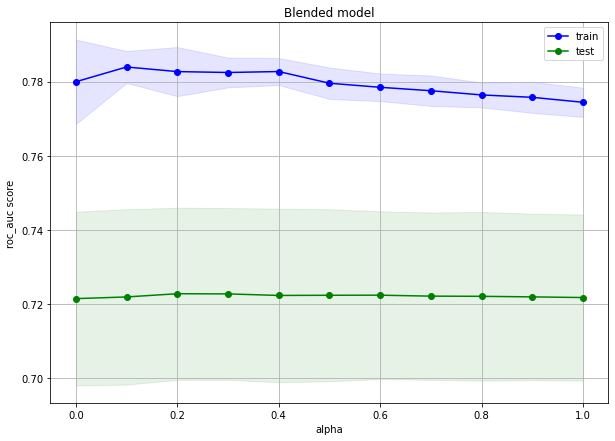

In [41]:
fig = plt.figure(figsize=(10,7))

plt.plot(blended_params_set['alpha'], blended_CV.cv_results_['mean_train_score'], 'bo-', label='train')
plt.plot(blended_params_set['alpha'], blended_CV.cv_results_['mean_test_score'], 'go-', label='test')

plt.fill_between(blended_params_set['alpha'], 
                 blended_CV.cv_results_['mean_train_score']-blended_CV.cv_results_['std_train_score'], 
                 blended_CV.cv_results_['mean_train_score']+blended_CV.cv_results_['std_train_score'], 
                 color='blue', alpha=0.1)
plt.fill_between(blended_params_set['alpha'], 
                 blended_CV.cv_results_['mean_test_score']-blended_CV.cv_results_['std_test_score'], 
                 blended_CV.cv_results_['mean_test_score']+blended_CV.cv_results_['std_test_score'], 
                 color='green', alpha=0.1)

plt.grid()
plt.xlabel('alpha'), 
plt.ylabel('roc_auc score')
plt.title('Blended model')
plt.legend()
plt.show()

Оценка качества на части (1000 элементов) тестовой выборки:

In [43]:
b_test_score = roc_auc_score(y_true=ny_test[:1000], y_score=blended_CV.best_estimator_.predict(nX_test[:1000]))
b_test_score

0.6838480342147062

In [44]:
print('По сравнению с "чистым" SVC качество изменилось на:', blended_CV.best_score_ - best9_svc_score )
print('По сравнению с "чистым" MLPClassifier качество изменилось на:', blended_CV.best_score_ - best9_mlpc_score )

По сравнению с "чистым" SVC качество изменилось на: 0.0009993049946465105
По сравнению с "чистым" MLPClassifier качество изменилось на: -0.0005234454733863414


*Вывод:* по сравнению с лучшей моделью из 9 задания (MLPClassifier) качество увеличить не удалось. `alpha=0.0` (т.е. только MLPClassifier) не оказалось выбрано при переборе по сетке, предположительно, потому что я забыла указать такое же `random_state` для модели MLPC, как и в 9 задании, и она отработала немного по-другому, показав в данном случае чуть меньшие результаты.

Наилучший парметр: 0.2. Т.е. 0.2\*svc + 0.8\*mlpc

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

#### 12

**Задание 12** (2 балла) 

Для каждого типа классификатора, а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

***Решение задания 12:***

Проведу 5-fold кросс-валидацию выбранных моделей на всех обучающих данных, с добавленными категориальными признаками *heroes* и стандартизированными признаками по *gold* и *lh*.

А так же вычислю значение качества каждой модели на тестовой выборке.

In [45]:
len(nX_train), len(nX_test)

(19979, 4995)

In [48]:
# Logistic Regression

the_best_logreg_model = LogisticRegression(tol=0.0001, 
                                        solver='saga',
                                        penalty='elasticnet',
                                        fit_intercept=False,
                                        C=0.1,
                                        l1_ratio=0.1,
                                        max_iter=500,
                                        random_state=1234)

best_logreg_cv_scores = cross_val_score(estimator=the_best_logreg_model,
                                        X=nX_train, y=ny_train,
                                        scoring='roc_auc',
                                        verbose=3)

the_best_logreg_model.fit(X=nX_train, y=ny_train)
best_logreg_test_score = roc_auc_score(y_true=ny_test,
                                       y_score=the_best_logreg_model.predict(nX_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.750, total=  21.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.6s remaining:    0.0s


[CV] .................................... , score=0.724, total=  18.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.3s remaining:    0.0s


[CV] .................................... , score=0.732, total=  22.9s
[CV]  ................................................................
[CV] .................................... , score=0.759, total=  21.9s
[CV]  ................................................................
[CV] .................................... , score=0.729, total=  23.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


In [49]:
# SVC

the_best_svc_model = SVC(C=0.01, 
                         kernel='linear',
                         gamma='scale',
                         tol=0.001,
                         random_state=1234)

best_svc_cv_scores = cross_val_score(estimator=the_best_svc_model,
                                     X=nX_train, y=ny_train,
                                     scoring='roc_auc',
                                     verbose=3)

the_best_svc_model.fit(X=nX_train, y=ny_train)
best_svc_test_score = roc_auc_score(y_true=ny_test,
                                    y_score=the_best_svc_model.predict(nX_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.746, total= 8.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.6min remaining:    0.0s


[CV] .................................... , score=0.718, total= 8.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 17.2min remaining:    0.0s


[CV] .................................... , score=0.727, total= 8.7min
[CV]  ................................................................
[CV] .................................... , score=0.753, total= 8.7min
[CV]  ................................................................
[CV] .................................... , score=0.724, total= 8.6min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 43.2min finished


In [50]:
# MLPClassifier

the_best_mlpc_model = MLPClassifier(activation='logistic',
                                    alpha=1,
                                    hidden_layer_sizes=(50,),
                                    solver='adam',
                                    learning_rate='constant',
                                    learning_rate_init=0.001,
                                    tol=0.0001,
                                    max_iter=1000,
                                    random_state=1234)

best_mlpc_cv_scores = cross_val_score(estimator=the_best_mlpc_model,
                                      X=nX_train, y=ny_train,
                                      scoring='roc_auc',
                                      verbose=3)

the_best_mlpc_model.fit(X=nX_train, y=ny_train)
best_mlpc_test_score = roc_auc_score(y_true=ny_test,
                                     y_score=the_best_mlpc_model.predict(nX_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.728, total=  19.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.8s remaining:    0.0s


[CV] .................................... , score=0.702, total=  23.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   42.9s remaining:    0.0s


[CV] .................................... , score=0.711, total=  14.2s
[CV]  ................................................................
[CV] .................................... , score=0.731, total=  22.1s
[CV]  ................................................................
[CV] .................................... , score=0.703, total=  20.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [52]:
# Blended

best12_mlpc_model = MLPClassifier(activation='logistic',
                                  alpha=1.0,
                                  hidden_layer_sizes=(50,),
                                  solver='adam',
                                  learning_rate='constant',
                                  learning_rate_init=0.001,
                                  tol=0.0001,
                                  max_iter=1000, 
                                  random_state=1234)

best12_svc_model = SVC(C=0.01, 
                       kernel='linear',
                       gamma='scale',
                       tol=0.001,
                       probability=True,
                       random_state=1234)

the_best_blend_model = MyBlendedModel(estimator1=best12_svc_model,
                                        estimator2=best12_mlpc_model,
                                        alpha=0.2)

best_blend_cv_scores = cross_val_score(estimator=the_best_blend_model,
                                       X=nX_train, y=ny_train,
                                       scoring='roc_auc',
                                       verbose=3)

the_best_blend_model.fit(X=nX_train, y=ny_train)
best_blend_test_score = roc_auc_score(y_true=ny_test,
                                      y_score=the_best_blend_model.predict(nX_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.734, total=38.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 38.0min remaining:    0.0s


[CV] .................................... , score=0.707, total=37.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 75.7min remaining:    0.0s


[CV] .................................... , score=0.717, total=37.8min
[CV]  ................................................................
[CV] .................................... , score=0.738, total=38.1min
[CV]  ................................................................
[CV] .................................... , score=0.709, total=37.6min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 189.2min finished


In [56]:
bp_df = pd.DataFrame({'LogReg':best_logreg_cv_scores,
                      'SVC':best_svc_cv_scores,
                      'MLPClassifier':best_mlpc_cv_scores,
                      'Blended (SVC+MLPC)':best_blend_cv_scores})

bp_df

,LogReg,SVC,MLPClassifier,Blended (SVC+MLPC)
0,0.749650,0.746260,0.727697,0.733943
1,0.724294,0.717570,0.702306,0.707333
2,0.732396,0.727441,0.711424,0.717307
3,0.759023,0.753296,0.730817,0.738104
4,0.729497,0.723568,0.702739,0.709450


Text(0, 0.5, 'roc_auc CV score')

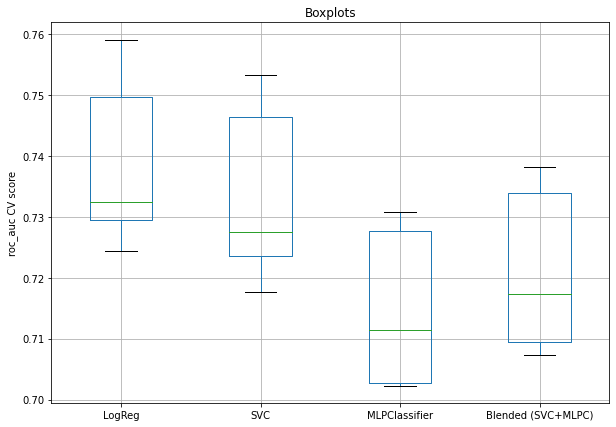

In [59]:
fig = plt.figure(figsize=(10,7))

bp_df.boxplot()

plt.title('Boxplots')
plt.ylabel('roc_auc CV score')

In [53]:
print('Logistic Regression test score:', best_logreg_test_score)
print('SVC test score:', best_svc_test_score)
print('MLPClassifier test score:', best_mlpc_test_score)
print('Blended model test score:', best_blend_test_score)

Logidtic Regression test score: 0.6936169151099785
SVC test score: 0.6934831042075666
MLPClassifier test score: 0.6709310735870114
Blended model test score: 0.6768584633630883


*Вывод:*

На большем количестве данных выше всего качество у логистической регрессии. А так же она обучается быстрее всего из четырех моделей, что позволяет провести с ней больше экспериментов с разными наборами признаков и параметров, получив оптимальные комбинации за разумное время. 

SVC обучается дольше всего, а так же сложна в настройке (что усложняется и тем, что она долго обучается). Однако на большем количестве данных она дала не самый худший результат из четырех.

Качество MLPClassifier-а упало на большем количестве данных. В ходе выполнения заданий эта модель показала себя, как самая чувствительная к масштабу признаков.

Смешанная модель показала себя плохо, т.к. была настроена на "большую долю" (0.8) MLPC, а он в результате проявил себя плохо, хуже чем SVC.

Если бы я еще успевала поучаствовать в конкурсе, я бы попробовала: 
- добавить признаки из оставшейся части датасета
- более тщательно подбирать параметры логистической регрессии и MLPC
- смешать логистическую регрессию и MLPC
- SVC бы не трогала, я его теперь боюсь: он долгий и капризный, по первому опыту... :( 

Не забудьте продолжить участвовать в соревнование, воспользовавшись всеми полученными наработками.